# **AWS SaaS Sales**
---

Istyarahma Kansya Kusumastuti\
JCDS 2702 - Juli 2025

# **A. Business Context**

## **Background**

The global cloud computing landscape has undergone significant transformation, with Software as a Service (SaaS) emerging as a central pillar of enterprise operations. Among the key players, Amazon Web Services (AWS) plays a pivotal role—not only as a provider of Infrastructure as a Service (IaaS) and Platform as a Service (PaaS)—but also as a major enabler of SaaS solutions [(Wittig & Wittig, 2023)](https://books.google.co.id/books?hl=en&lr=&id=joK3EAAAQBAJ&oi=fnd&pg=PA1&dq=saas+aws&ots=DsRkTvawoT&sig=NByZJ-ip7MWxJ-XizKPU8iht3Nc&redir_esc=y#v=onepage&q=saas%20aws&f=false). AWS supports a vast ecosystem of third-party SaaS providers by offering scalable, secure, and high-performance cloud infrastructure, allowing businesses to deliver full-featured software applications to end users without managing underlying hardware or platforms  [(Pinto et al., 2022)](https://docs.aws.amazon.com/prescriptive-guidance/latest/integrate-third-party-services/welcome.html).

AWS has demonstrated consistent revenue growth in the first quarter of each year, starting from approximately USD 10.2 billion in 2020, rising to USD 13.5 billion (2021), USD 18.4 billion (2022), USD 21.4 billion (2023), USD 25.0 billion (2024), and reaching USD 29.3 billion (2025), a 17% year-over-year increase  [(Amazon, 2021; 2022; 2023; 2024; 2025)](https://ir.aboutamazon.com/search-results/default.aspx?SearchTerm=first+quarter+results). In the same quarter, Microsoft’s Intelligent Cloud division reported USD 26.8 billion in revenue, with Azure continuing to show strong momentum, while Google Cloud posted USD 12.3 billion. Market share estimates for Q1 2025 placed AWS at 29%, followed by Microsoft Azure at 22% and Google Cloud at 12%, illustrating AWS’s continued leadership in the sector despite increasing competition  [(Synergy Research Group, 2025)](https://www.srgresearch.com/articles/ai-helps-cloud-market-growth-rate-jump-back-to-almost-25-in-q1). 

Although the demand for SaaS solutions continues to rise, analysis of the AWS SaaS sales dataset reveals a critical concern as a considerable number of transactions resulted in negative profit, including those with relatively high sales values. This observation raises important questions regarding the effectiveness of AWS’s SaaS pricing strategies, discounting practices, and the performance of specific products, regions, or customer segments. Accordingly, this study investigates the key determinants of profitability in AWS SaaS transactions by focusing on pricing dynamics, product-level outcomes, and customer characteristics. Identifying these underlying factors is vital for informing revenue optimization strategies and enhancing the long-term sustainability of SaaS offerings within the AWS ecosystem.


## **Business Problem Statements**

Despite the upward trend in revenue and market dominance, AWS SaaS transactions between 2020 and 2023 show a substantial number of unprofitable sales, including those with high sales figures. This indicates potential inefficiencies in pricing strategy, discounting practices, or product and customer segmentation. The lack of profitability in such transactions poses a risk to the long-term financial sustainability of SaaS operations built on AWS infrastructure. Identifying and addressing the root causes of these negative margins is essential for optimizing business outcomes. This leads to the central business problem: ***"Why do a substantial number of AWS SaaS transactions remain unprofitable, despite high sales and increasing revenue? How can AWS optimize its disounting strategies to ensure sustainability?"***

## **Goals**

This analysis aims to address several critical business questions related to AWS SaaS transactions and sales performance:

1. Identify the distribution of transactions by profit category (positive vs. negative) to understand the overall profitability structure of AWS SaaS sales.

2. Analyze sales and profit trends over time to identify potential seasonality and long-term performance shifts.

3. Identify key factors contributing to negative profit in AWS SaaS transactions, including sales, discount, quantity, price, profit margin, products, spatial factors (region, subregion, country), and customer type (customer and segment).

4. Evaluate and optimize AWS’s discounting strategies across customer segments and product lines, with the aim of enhancing overall profitability beyond a volume-driven sales model.

## **Analytical Approach**
The analysis encompasses univariate, bivariate, and multivariate methods. Bivariate techniques applied include correlation analysis, chi-square tests, analysis of variance (ANOVA), and independent samples t-tests. Multivariate analysis is performed using multiple logistic regression to identify adjusted associations between variables.

## **Import Libraries**

To facilitate the analysis of this dataset, the following libraries were utilized:

In [1]:
# Data Manipulaton and Analysis Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Statistical Analysis Library
import scipy.stats
from statsmodels.formula.api import ols

# Warning Suppression
import warnings
warnings.filterwarnings('ignore')

# **B. Data Understanding**

This dataset contains transaction records from a fictitious Software as a Service (SaaS) company that provides sales and marketing software to other businesses (B2B – Business-to-Business). Each row in the dataset represents a single transaction or order, comprising a total of 9,994 transactions. The dataset consists of 19 variables (columns), each capturing specific aspects of the transaction. A detailed description of these variables is provided in the table below.

### **Columns Description**

| **No** | **Column Name**  | **Description**                                          |
| -----: | ---------------- | -------------------------------------------------------- |
|      1 | **Row ID**       | A unique identifier for each transaction.                |
|      2 | **Order ID**     | A unique identifier for each order.                      |
|      3 | **Order Date**   | The date when the order was placed.                      |
|      4 | **Date Key**     | A numerical representation of the order date (YYYYMMDD). |
|      5 | **Contact Name** | The name of the person who placed the order.             |
|      6 | **Country**      | The country where the order was placed.                  |
|      7 | **City**         | The city where the order was placed.                     |
|      8 | **Region**       | The region where the order was placed.                   |
|      9 | **Subregion**    | The subregion where the order was placed.                |
|     10 | **Customer**     | The name of the company that placed the order.           |
|     11 | **Customer ID**  | A unique identifier for each customer.                   |
|     12 | **Industry**     | The industry the customer belongs to.                    |
|     13 | **Segment**      | The customer segment (SMB, Strategic, Enterprise, etc.). |
|     14 | **Product**      | The product was ordered.                                 |
|     15 | **License**      | The license key for the product.                         |
|     16 | **Sales**        | The total sales amount for the transaction.              |
|     17 | **Quantity**     | The total number of items in the transaction.            |
|     18 | **Discount**     | The discount applied to the transaction.                 |
|     19 | **Profit**       | The profit from the transaction.                         |


## **Load Dataset**

To enable further analysis, the dataset `SaaS-Sales.csv` was read into a DataFrame called `df` using the `read_csv()` function from the pandas library. Subsequently, the top five and bottom five rows of the dataset were examined using the `head()` and `tail()` functions, respectively, to gain a preliminary understanding of the dataset’s structure and content.

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
display(df.head(), df.tail())

Row ID          Order ID  Order Date  Date Key    Contact Name  \
0       1  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
1       2  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
2       3  AMER-2022-138688   6/13/2022  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   
4       5  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   

         Country           City Region Subregion           Customer  \
0        Ireland         Dublin   EMEA      UKIR            Chevron   
1        Ireland         Dublin   EMEA      UKIR            Chevron   
2  United States  New York City   AMER     NAMER        Phillips 66   
3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   

   Customer ID Industry    Segment                 Product     License  \
0         1017   Energy        SMB         Marketing Suite  16GRM07R1K   
1         1017   Energy        SMB              FinanceHub  QLIW57KZUV   
2         1056   Energy  Strategic              FinanceHub  JI6BVL70HQ   
3         1031   Energy        SMB          ContactMatcher  DE9GJKGD44   
4         1031   Energy        SMB  Marketing Suite - Gold  OIF7NY23WD   

      Sales  Quantity  Discount    Profit  
0  261.9600         2      0.00   41.9136  
1  731.9400         3      0.00  219.5820  
2   14.6200         2      0.00    6.8714  
3  957.5775         5      0.45 -383.0310  
4   22.3680         2      0.20    2.5164

Row ID          Order ID Order Date  Date Key       Contact Name  \
9989    9990  EMEA-2020-110422  1/22/2020  20200122          Dan Allan   
9990    9991  AMER-2023-121258  2/27/2023  20230227  Anthony Sanderson   
9991    9992  AMER-2023-121258  2/27/2023  20230227  Anthony Sanderson   
9992    9993  AMER-2023-121258  2/27/2023  20230227  Anthony Sanderson   
9993    9994  AMER-2023-119914   5/5/2023  20230505   Jasmine Springer   

            Country       City Region Subregion           Customer  \
9989        Germany    Hamburg   EMEA   EU-WEST  Johnson & Johnson   
9990  United States  Milwaukee   AMER     NAMER   American Express   
9991  United States  Milwaukee   AMER     NAMER   American Express   
9992  United States  Milwaukee   AMER     NAMER   American Express   
9993  United States     Dallas   AMER     NAMER            Comcast   

      Customer ID        Industry Segment              Product     License  \
9989         1055      Healthcare     SMB  SaaS Connector Pack  ETHXMB5TMD   
9990         1005         Finance     SMB  SaaS Connector Pack  LYHOKTRY7L   
9991         1005         Finance     SMB       Site Analytics  I5SVMI6M88   
9992         1005         Finance     SMB              Support  JHLW4P6LQ2   
9993         1022  Communications     SMB              OneView  3NTBV9B3PS   

        Sales  Quantity  Discount   Profit  
9989   25.248         3       0.2   4.1028  
9990   91.960         2       0.0  15.6332  
9991  258.576         2       0.2  19.3932  
9992   29.600         4       0.0  13.3200  
9993  243.160         2       0.0  72.9480

## **Data Type Examination**

The data types of each variable were examined to ensure that all columns were in appropriate formats for analysis. This step is essential to prevent errors during data processing and to facilitate accurate statistical computation and visualization. The `info()` function was used to examine the data types of each variable in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Based on the results above, four columns were identified as requiring further attention due to their potential impact on data processing and analysis: `Row ID`, `Order Date`, `Date Key`, and `Customer ID`.

**1. Order Date**\
    The `Order Date` column is currently stored as a `string`. To enable efficient temporal analysis—such as filtering by date, extracting time components, or performing time-based calculations—the column must be converted to a `datetime` data type. This ensures compatibility with time-series functions and prevents potential parsing errors during analysis.
    
**2. Customer ID**\
   The `Customer ID` column contains numeric values. However, it functions as a categorical identifier rather than a variable intended for computation. Keeping it as an integer increases the risk of unintended mathematical operations (e.g., aggregation or averaging), which could mislead interpretation. Converting this column to a `string` (object) type is therefore more appropriate to preserve its categorical nature and ensure analytical accuracy.
   
**3. Row ID**\
   The `Row ID` column was dropped from the dataset as it serves merely as a unique identifier and duplicates the function of the DataFrame’s default `index`. Retaining it would introduce redundancy without adding analytical value.
   
**4. Date Key**\
   The `Date Key` column was also removed, as it contains the same information as `Order Date` but in a numeric format (YYYYMMDD). Since Order Date can be more effectively utilized for temporal analysis once converted to a datetime type, keeping both columns would be unnecessary and redundant.

## **Data Adjustments**
To support further analysis, the dataset was extended by introducing two additional columns: profit margin and price per unit.

In [4]:
df['Profit Margin'] = round((df['Profit'] / df['Sales']) * 100, 2)
df['Price Per Unit'] = df['Sales']/(df['Quantity']*(1-df['Discount']))
df.head()

Row ID          Order ID  Order Date  Date Key    Contact Name  \
0       1  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
1       2  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
2       3  AMER-2022-138688   6/13/2022  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   
4       5  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   

         Country           City Region Subregion           Customer  ...  \
0        Ireland         Dublin   EMEA      UKIR            Chevron  ...   
1        Ireland         Dublin   EMEA      UKIR            Chevron  ...   
2  United States  New York City   AMER     NAMER        Phillips 66  ...   
3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell  ...   
4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell  ...   

   Industry    Segment                 Product     License     Sales  \
0    Energy        SMB         Marketing Suite  16GRM07R1K  261.9600   
1    Energy        SMB              FinanceHub  QLIW57KZUV  731.9400   
2    Energy  Strategic              FinanceHub  JI6BVL70HQ   14.6200   
3    Energy        SMB          ContactMatcher  DE9GJKGD44  957.5775   
4    Energy        SMB  Marketing Suite - Gold  OIF7NY23WD   22.3680   

   Quantity  Discount    Profit  Profit Margin  Price Per Unit  
0         2      0.00   41.9136          16.00          130.98  
1         3      0.00  219.5820          30.00          243.98  
2         2      0.00    6.8714          47.00            7.31  
3         5      0.45 -383.0310         -40.00          348.21  
4         2      0.20    2.5164          11.25           13.98  

[5 rows x 21 columns]

A cleaned dataset `df_clean` was prepared by removing columns that were not relevant to the analysis, such as order ID and other non-analytical identifiers. In addition to eliminating unnecessary columns, several new variables were introduced based on transformations of existing ones. These include categorical versions of numerical variables (e.g., sales and profit categories), as well as recoded variables to facilitate interpretation and modeling. This preprocessing step ensures that the dataset is more analytically focused and suitable for statistical analysis. 

In [5]:
df_clean = df.copy()
df_clean = df_clean.drop(columns=['Row ID', 'Date Key', 'Order ID', 'Contact Name', 'Customer ID', 'License'])
df_clean.head()

Order Date        Country           City Region Subregion  \
0   11/9/2022        Ireland         Dublin   EMEA      UKIR   
1   11/9/2022        Ireland         Dublin   EMEA      UKIR   
2   6/13/2022  United States  New York City   AMER     NAMER   
3  10/11/2021        Germany      Stuttgart   EMEA   EU-WEST   
4  10/11/2021        Germany      Stuttgart   EMEA   EU-WEST   

            Customer Industry    Segment                 Product     Sales  \
0            Chevron   Energy        SMB         Marketing Suite  261.9600   
1            Chevron   Energy        SMB              FinanceHub  731.9400   
2        Phillips 66   Energy  Strategic              FinanceHub   14.6200   
3  Royal Dutch Shell   Energy        SMB          ContactMatcher  957.5775   
4  Royal Dutch Shell   Energy        SMB  Marketing Suite - Gold   22.3680   

   Quantity  Discount    Profit  Profit Margin  Price Per Unit  
0         2      0.00   41.9136          16.00          130.98  
1         3      0.00  219.5820          30.00          243.98  
2         2      0.00    6.8714          47.00            7.31  
3         5      0.45 -383.0310         -40.00          348.21  
4         2      0.20    2.5164          11.25           13.98

In [6]:
# Profit was transformed into a new categorical variable named Profit 3 Cat
conditions = [
    df_clean['Profit'] < 0,
    df_clean['Profit'] > 0,
    df_clean['Profit'] == 0
]
labels = ['Negative', 'Positive', 'Zero']

df_clean['Profit 3 Cat'] = np.select(conditions, labels, default='Unknown')

In [7]:
# Profit was transformed into a new categorical variable named Profit 2 Cat
conditions = [
    df_clean['Profit'] < 0,
    df_clean['Profit'] >= 0,
]
labels = ['Negative', 'Positive']

df_clean['Profit 2 Cat'] = np.select(conditions, labels, default='Unknown')

In [8]:
# Sales was transformed into a new categorical variable named Sales Cat
Q1_sales = df_clean['Sales'].quantile(0.25)
Q2_sales = df_clean['Sales'].quantile(0.5)
Q3_sales = df_clean['Sales'].quantile(0.75)

conditions = [
    df_clean['Sales'] < Q1_sales,
    df_clean['Sales'] > Q3_sales,
    (df_clean['Sales'] >= Q1_sales) & (df_clean['Sales'] <= Q3_sales)
]
labels = ['Low', 'High', 'Moderate']

df_clean['Sales Cat'] = np.select(conditions, labels, default='Unknown')

In [10]:
# Profit 2 Cat was recoded into a binary variable (Profit Binary), 
# with Positive as 0 and Negative as 1, to support multivariate analysis.
df_clean['Profit Binary'] = df_clean['Profit 2 Cat'].map({
    'Positive': 0,
    'Negative': 1
})
df_clean.head(10)

Order Date        Country           City Region Subregion  \
0   11/9/2022        Ireland         Dublin   EMEA      UKIR   
1   11/9/2022        Ireland         Dublin   EMEA      UKIR   
2   6/13/2022  United States  New York City   AMER     NAMER   
3  10/11/2021        Germany      Stuttgart   EMEA   EU-WEST   
4  10/11/2021        Germany      Stuttgart   EMEA   EU-WEST   
5    6/9/2020  United States  New York City   AMER     NAMER   
6    6/9/2020  United States  New York City   AMER     NAMER   
7    6/9/2020  United States  New York City   AMER     NAMER   
8    6/9/2020  United States  New York City   AMER     NAMER   
9    6/9/2020  United States  New York City   AMER     NAMER   

            Customer Industry    Segment                 Product     Sales  \
0            Chevron   Energy        SMB         Marketing Suite  261.9600   
1            Chevron   Energy        SMB              FinanceHub  731.9400   
2        Phillips 66   Energy  Strategic              FinanceHub   14.6200   
3  Royal Dutch Shell   Energy        SMB          ContactMatcher  957.5775   
4  Royal Dutch Shell   Energy        SMB  Marketing Suite - Gold   22.3680   
5        BNP Paribas  Finance        SMB     SaaS Connector Pack   48.8600   
6        BNP Paribas  Finance        SMB          ChatBot Plugin    7.2800   
7        BNP Paribas  Finance        SMB          Site Analytics  907.1520   
8        BNP Paribas  Finance        SMB          ContactMatcher   18.5040   
9        BNP Paribas  Finance        SMB                 OneView  114.9000   

   Quantity  Discount    Profit  Profit Margin  Price Per Unit Profit 3 Cat  \
0         2      0.00   41.9136          16.00          130.98     Positive   
1         3      0.00  219.5820          30.00          243.98     Positive   
2         2      0.00    6.8714          47.00            7.31     Positive   
3         5      0.45 -383.0310         -40.00          348.21     Negative   
4         2      0.20    2.5164          11.25           13.98     Positive   
5         7      0.00   14.1694          29.00            6.98     Positive   
6         4      0.00    1.9656          27.00            1.82     Positive   
7         6      0.20   90.7152          10.00          188.99     Positive   
8         3      0.20    5.7825          31.25            7.71     Positive   
9         5      0.00   34.4700          30.00           22.98     Positive   

  Profit 2 Cat Sales Cat  Profit Binary  
0     Positive      High              0  
1     Positive      High              0  
2     Positive       Low              0  
3     Negative      High              1  
4     Positive  Moderate              0  
5     Positive  Moderate              0  
6     Positive       Low              0  
7     Positive      High              0  
8     Positive  Moderate              0  
9     Positive  Moderate              0

## **Descriptive Statistics**

### **Numerical Variables**

In [11]:
df.describe().transpose()

count          mean           std           min  \
Row ID          9994.0  4.997500e+03   2885.163629  1.000000e+00   
Date Key        9994.0  2.021803e+07  11238.975964  2.020010e+07   
Customer ID     9994.0  1.049772e+03     29.719388  1.001000e+03   
Sales           9994.0  2.298580e+02    623.245101  4.440000e-01   
Quantity        9994.0  3.789574e+00      2.225110  1.000000e+00   
Discount        9994.0  1.562027e-01      0.206452  0.000000e+00   
Profit          9994.0  2.865690e+01    234.260108 -6.599978e+03   
Profit Margin   9994.0  1.203139e+01     46.675436 -2.750000e+02   
Price Per Unit  9994.0  7.557113e+01    188.961461  9.900000e-01   

                         25%           50%           75%           max  
Row ID          2.499250e+03  4.997500e+03  7.495750e+03  9.994000e+03  
Date Key        2.021052e+07  2.022063e+07  2.023052e+07  2.023123e+07  
Customer ID     1.024000e+03  1.049000e+03  1.076000e+03  1.101000e+03  
Sales           1.728000e+01  5.449000e+01  2.099400e+02  2.263848e+04  
Quantity        2.000000e+00  3.000000e+00  5.000000e+00  1.400000e+01  
Discount        0.000000e+00  2.000000e-01  2.000000e-01  8.000000e-01  
Profit          1.728750e+00  8.666500e+00  2.936400e+01  8.399976e+03  
Profit Margin   7.500000e+00  2.700000e+01  3.625000e+01  5.000000e+01  
Price Per Unit  6.480000e+00  1.998000e+01  7.698000e+01  7.546160e+03

**Insights**
1. The dataset comprises transaction records from January 2020 to December 2023, covering nearly four years of AWS SaaS sales activity.
2. The average sales value per transaction is approximately 230 USD. However, this figure is influenced by a small number of high-value outliers. The median sales amount is considerably lower (54.5 USD), indicating that most transactions involve modest expenditures.
3. The quantity of items purchased per transaction typically ranges from two to five units.
4. Discounts were commonly applied, with a mean discount of 15.6%. A considerable portion of transactions received a 20% discount, and some were subject to much higher reductions, reaching up to 80%.
5. The average profit per transaction is around 28 USD.
6. Profit margins display a wide range, although the median margin remains relatively stable at 27%.
7. Product pricing is generally low, with a median price per unit of approximately 20 USD. Nonetheless, the presence of a few high-priced items raises the average unit price to about 75 USD.

### **Categorical Variables**

In [12]:
df.describe(include='object').transpose()

count unique               top  freq
Order ID      9994   5009  EMEA-2023-100111    14
Order Date    9994   1237          9/6/2022    38
Contact Name  9994    793     Leonard Kelly    37
Country       9994     48     United States  2001
City          9994    262            London   922
Region        9994      3              EMEA  4219
Subregion     9994     12             NAMER  2507
Customer      9994     99           Allianz   192
Industry      9994     10           Finance  2127
Segment       9994      3               SMB  5191
Product       9994     14    ContactMatcher  1842
License       9994   9994        3NTBV9B3PS     1

**Insights**
1. The dataset comprises 9,994 transactions, each associated with a unique order ID. However, there are only 5,009 unique order IDs, indicating that several orders appear multiple times, with the most frequent one occurring 14 times.
2. There are 793 unique contact names, with "Leonard Kelly" appearing most frequently (37 times).
3. Transactions span 48 countries and 262 cities, with the United States and London being the most represented, accounting for 2,001 and 922 transactions respectively.
4. The dataset is dominated by entries from the EMEA region (4,219) and the NAMER subregion (2,507).
5. A total of 99 customers are recorded, with "Allianz" being the most frequent (n = 192), matched by the same frequency for the customer ID "1080".
6. The finance industry is the most represented sector, appearing in 2,127 transactions.
7. The majority of transactions are associated with the SMB segment (5,191), suggesting a primary focus on small and medium-sized businesses.
8. There are 14 unique products, with "ContactMatcher" being the most frequently sold (1,842).
9. Each transaction is associated with a distinct license key, reflecting the presence of 9,994 unique licenses.

# **C. Data Cleaning**

## **Convert Data Types to Align With Their Intended Use**

Following the data types examination conducted during the data understanding phase, appropriate type conversions were applied in the data cleaning stage. The `Order Date` column was transformed from `string` to `datetime`, while the `Customer ID` column was reformatted from `integer` to `string` to reflect its categorical nature and avoid misinterpretation as a numerical variable.

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Customer ID'] = df['Customer ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Date Key        9994 non-null   int64         
 4   Contact Name    9994 non-null   object        
 5   Country         9994 non-null   object        
 6   City            9994 non-null   object        
 7   Region          9994 non-null   object        
 8   Subregion       9994 non-null   object        
 9   Customer        9994 non-null   object        
 10  Customer ID     9994 non-null   object        
 11  Industry        9994 non-null   object        
 12  Segment         9994 non-null   object        
 13  Product         9994 non-null   object        
 14  License         9994 non-null   object        
 15  Sale

## **Drop Redundant Columns**

The `Row ID` and `Date Key` columns were identified as redundant and were removed to minimize duplication and enhance clarity in the analysis.

In [14]:
df = df.drop(columns=['Row ID','Date Key'])
df.head()

Order ID Order Date    Contact Name        Country           City  \
0  EMEA-2022-152156 2022-11-09     Nathan Bell        Ireland         Dublin   
1  EMEA-2022-152156 2022-11-09     Nathan Bell        Ireland         Dublin   
2  AMER-2022-138688 2022-06-13  Deirdre Bailey  United States  New York City   
3  EMEA-2021-108966 2021-10-11      Zoe Hodges        Germany      Stuttgart   
4  EMEA-2021-108966 2021-10-11      Zoe Hodges        Germany      Stuttgart   

  Region Subregion           Customer Customer ID Industry    Segment  \
0   EMEA      UKIR            Chevron        1017   Energy        SMB   
1   EMEA      UKIR            Chevron        1017   Energy        SMB   
2   AMER     NAMER        Phillips 66        1056   Energy  Strategic   
3   EMEA   EU-WEST  Royal Dutch Shell        1031   Energy        SMB   
4   EMEA   EU-WEST  Royal Dutch Shell        1031   Energy        SMB   

                  Product     License     Sales  Quantity  Discount    Profit  \
0         Marketing Suite  16GRM07R1K  261.9600         2      0.00   41.9136   
1              FinanceHub  QLIW57KZUV  731.9400         3      0.00  219.5820   
2              FinanceHub  JI6BVL70HQ   14.6200         2      0.00    6.8714   
3          ContactMatcher  DE9GJKGD44  957.5775         5      0.45 -383.0310   
4  Marketing Suite - Gold  OIF7NY23WD   22.3680         2      0.20    2.5164   

   Profit Margin  Price Per Unit  
0          16.00          130.98  
1          30.00          243.98  
2          47.00            7.31  
3         -40.00          348.21  
4          11.25           13.98

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        9994 non-null   object        
 1   Order Date      9994 non-null   datetime64[ns]
 2   Contact Name    9994 non-null   object        
 3   Country         9994 non-null   object        
 4   City            9994 non-null   object        
 5   Region          9994 non-null   object        
 6   Subregion       9994 non-null   object        
 7   Customer        9994 non-null   object        
 8   Customer ID     9994 non-null   object        
 9   Industry        9994 non-null   object        
 10  Segment         9994 non-null   object        
 11  Product         9994 non-null   object        
 12  License         9994 non-null   object        
 13  Sales           9994 non-null   float64       
 14  Quantity        9994 non-null   int64         
 15  Disc

## **Identify Missing Values**

In [16]:
missing = pd.DataFrame(df.isna().sum()).rename(columns={0:'n Missing'})
missing['% Missing'] = 100 * (round(missing['n Missing']/len(df), 4))
missing

n Missing  % Missing
Order ID                0        0.0
Order Date              0        0.0
Contact Name            0        0.0
Country                 0        0.0
City                    0        0.0
Region                  0        0.0
Subregion               0        0.0
Customer                0        0.0
Customer ID             0        0.0
Industry                0        0.0
Segment                 0        0.0
Product                 0        0.0
License                 0        0.0
Sales                   0        0.0
Quantity                0        0.0
Discount                0        0.0
Profit                  0        0.0
Profit Margin           0        0.0
Price Per Unit          0        0.0

<Axes: >

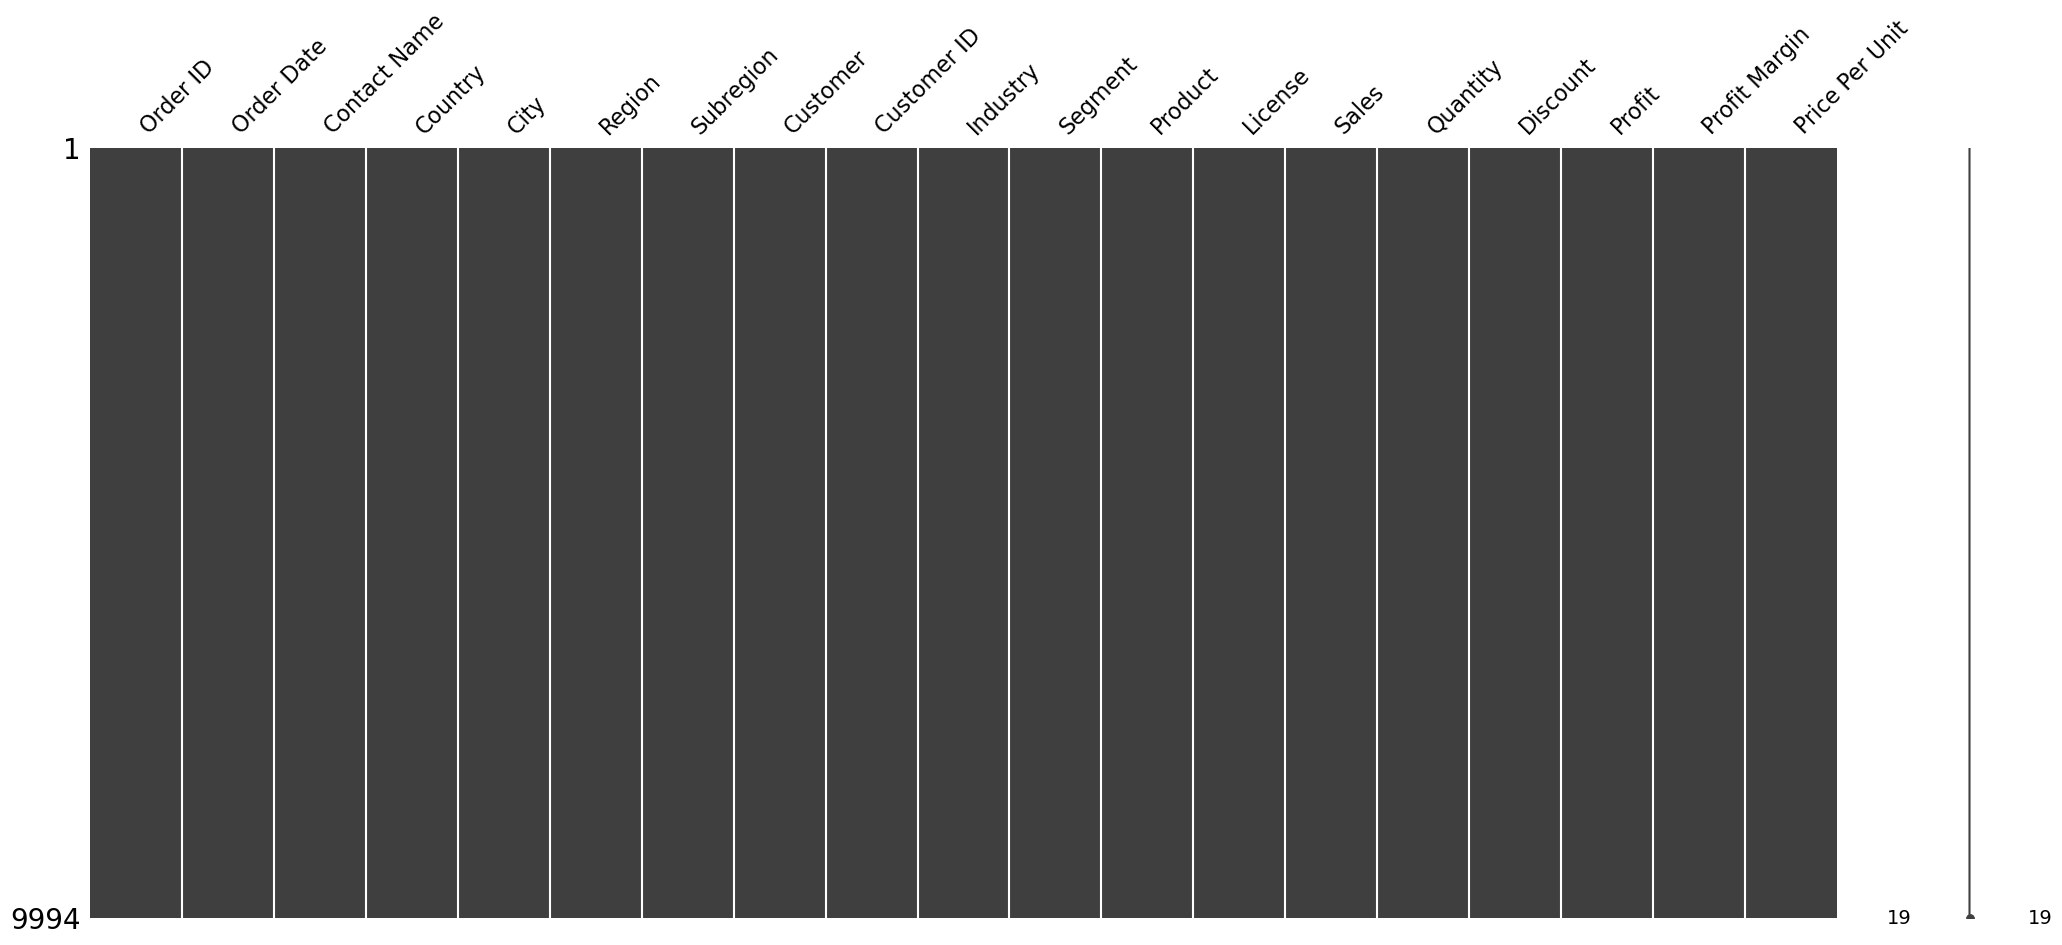

In [17]:
# Visualization of Missing Value Distribution per Column
missingno.matrix(df)

Based on the output above, **none of the variables in the dataset contain missing values**. This indicates that the dataset is complete and **does not require any imputation or removal of incomplete entries**.

## **Identify Duplicated Values**

In [18]:
df.duplicated().sum()

np.int64(0)

**No duplicated records were found in the dataset.**

In [19]:
df.nunique()

Order ID          5009
Order Date        1237
Contact Name       793
Country             48
City               262
Region               3
Subregion           12
Customer            99
Customer ID         99
Industry            10
Segment              3
Product             14
License           9994
Sales             5825
Quantity            14
Discount            12
Profit            7287
Profit Margin      288
Price Per Unit    2341
dtype: int64

In [20]:
data_unique = pd.DataFrame({
    'n Non-Null': df.notna().sum(),
    'n Unique': df.nunique()
})

data_unique['% Unique'] = round(100 * (data_unique['n Unique'] / data_unique['n Non-Null']),2)
data_unique

n Non-Null  n Unique  % Unique
Order ID              9994      5009     50.12
Order Date            9994      1237     12.38
Contact Name          9994       793      7.93
Country               9994        48      0.48
City                  9994       262      2.62
Region                9994         3      0.03
Subregion             9994        12      0.12
Customer              9994        99      0.99
Customer ID           9994        99      0.99
Industry              9994        10      0.10
Segment               9994         3      0.03
Product               9994        14      0.14
License               9994      9994    100.00
Sales                 9994      5825     58.28
Quantity              9994        14      0.14
Discount              9994        12      0.12
Profit                9994      7287     72.91
Profit Margin         9994       288      2.88
Price Per Unit        9994      2341     23.42

Based on domain knowledge, the **Order ID column is expected to represent a unique transaction per order**. However, within the 9,994 rows, **only approximately 0.99% of Customer ID values are unique**, which raises questions regarding the structure of customer data. Interestingly, the **License column contains entirely unique values**, suggesting that **each row may correspond to a distinct license issuance rather than a unique order or customer**.

In [21]:
order_counts = df['Order ID'].value_counts()
duplicate_orders = order_counts[order_counts > 1]

df_duplicate_orders = duplicate_orders.reset_index()
df_duplicate_orders.columns = ['Order ID', 'Count']

df_duplicate_orders

Order ID  Count
0     EMEA-2023-100111     14
1     EMEA-2023-157987     12
2     AMER-2022-165330     11
3     EMEA-2022-108504     11
4     EMEA-2021-126977     10
...                ...    ...
2466  AMER-2020-139451      2
2467  EMEA-2023-163629      2
2468  EMEA-2021-100251      2
2469  AMER-2022-157728      2
2470  EMEA-2021-103772      2

[2471 rows x 2 columns]

In [22]:
# Check for duplicates in Order ID = EMEA-2023-100111
df[df['Order ID'] == 'EMEA-2023-100111']

Order ID Order Date Contact Name         Country    City Region  \
6090  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   
6091  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   
6092  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   
6093  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   
6094  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   
6095  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   
6096  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   
6097  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   
6098  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   
6099  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   
6100  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   
6101  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   
6102  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   
6103  EMEA-2023-100111 2023-09-21  Irene Walsh  United Kingdom  London   EMEA   

     Subregion     Customer Customer ID Industry Segment  \
6090      UKIR  Wells Fargo        1099  Finance     SMB   
6091      UKIR  Wells Fargo        1099  Finance     SMB   
6092      UKIR  Wells Fargo        1099  Finance     SMB   
6093      UKIR  Wells Fargo        1099  Finance     SMB   
6094      UKIR  Wells Fargo        1099  Finance     SMB   
6095      UKIR  Wells Fargo        1099  Finance     SMB   
6096      UKIR  Wells Fargo        1099  Finance     SMB   
6097      UKIR  Wells Fargo        1099  Finance     SMB   
6098      UKIR  Wells Fargo        1099  Finance     SMB   
6099      UKIR  Wells Fargo        1099  Finance     SMB   
6100      UKIR  Wells Fargo        1099  Finance     SMB   
6101      UKIR  Wells Fargo        1099  Finance     SMB   
6102      UKIR  Wells Fargo        1099  Finance     SMB   
6103      UKIR  Wells Fargo        1099  Finance     SMB   

                     Product     License     Sales  Quantity  Discount  \
6090              FinanceHub  P4ADV65M2W   272.646         3       0.1   
6091            Data Smasher  MRQVS1IAI2   212.800         2       0.0   
6092                 Support  CR7GDFZ4N5    38.520         9       0.0   
6093            Data Smasher  76KD0N6CLZ    72.640         2       0.0   
6094  Marketing Suite - Gold  C4LDXSXP4H    45.400         4       0.0   
6095                 Support  KVC7PWPX2U    13.760         2       0.0   
6096              FinanceHub  IK56JWXUW4    80.991         1       0.1   
6097          ContactMatcher  V0JH5KY06Z    11.784         3       0.2   
6098                 Storage  DN273SIMXN     4.360         2       0.0   
6099              FinanceHub  3Z6T4L1UGM  2888.127        11       0.1   
6100          Site Analytics  YLFQ5PX8M3  1299.660         2       0.0   
6101              FinanceHub  STMA95JTL7  2254.410         5       0.1   
6102          Site Analytics  7JFVQNNGHG   104.850         3       0.0   
6103            Data Smasher  68J505TUJT    59.970         3       0.0   

        Profit  Profit Margin  Price Per Unit  
6090   18.1764           6.67          100.98  
6091   95.7600          45.00          106.40  
6092   18.1044          47.00            4.28  
6093   21.7920          30.00           36.32  
6094   12.7120          28.00           11.35  
6095    6.3296          46.00            6.88  
6096    8.0991          10.00           89.99  
6097    3.9771          33.75            4.91  
6098    1.7876          41.00            2.18  
6099  609.7157          21.11          291.73  
6100  350.9082          27.00          649.83  
6101  375.7350          16.67          500.98  
6102   28.3095          27.00           34.95  
6103   20.3898          34.00           19.99

In [23]:
# Check for duplicates in Order ID = EMEA-2023-157987
df[df['Order ID'] == 'EMEA-2023-157987']

Order ID Order Date Contact Name         Country    City Region  \
1946  EMEA-2023-157987 2023-09-03  Gordon Dyer  United Kingdom  London   EMEA   
1947  EMEA-2023-157987 2023-09-03  Gordon Dyer  United Kingdom  London   EMEA   
1948  EMEA-2023-157987 2023-09-03  Gordon Dyer  United Kingdom  London   EMEA   
1949  EMEA-2023-157987 2023-09-03  Gordon Dyer  United Kingdom  London   EMEA   
1950  EMEA-2023-157987 2023-09-03  Gordon Dyer  United Kingdom  London   EMEA   
1951  EMEA-2023-157987 2023-09-03  Gordon Dyer  United Kingdom  London   EMEA   
1952  EMEA-2023-157987 2023-09-03  Gordon Dyer  United Kingdom  London   EMEA   
1953  EMEA-2023-157987 2023-09-03  Gordon Dyer  United Kingdom  London   EMEA   
1954  EMEA-2023-157987 2023-09-03  Gordon Dyer  United Kingdom  London   EMEA   
1955  EMEA-2023-157987 2023-09-03  Gordon Dyer  United Kingdom  London   EMEA   
1956  EMEA-2023-157987 2023-09-03  Gordon Dyer  United Kingdom  London   EMEA   
1957  EMEA-2023-157987 2023-09-03  Gordon Dyer  United Kingdom  London   EMEA   

     Subregion             Customer Customer ID Industry    Segment  \
1946      UKIR  Samsung Electronics        1015     Tech  Strategic   
1947      UKIR  Samsung Electronics        1015     Tech  Strategic   
1948      UKIR  Samsung Electronics        1015     Tech  Strategic   
1949      UKIR  Samsung Electronics        1015     Tech  Strategic   
1950      UKIR  Samsung Electronics        1015     Tech  Strategic   
1951      UKIR  Samsung Electronics        1015     Tech  Strategic   
1952      UKIR  Samsung Electronics        1015     Tech  Strategic   
1953      UKIR  Samsung Electronics        1015     Tech  Strategic   
1954      UKIR  Samsung Electronics        1015     Tech  Strategic   
1955      UKIR  Samsung Electronics        1015     Tech  Strategic   
1956      UKIR  Samsung Electronics        1015     Tech  Strategic   
1957      UKIR  Samsung Electronics        1015     Tech  Strategic   

                  Product     License     Sales  Quantity  Discount    Profit  \
1946       ChatBot Plugin  MTY5AW6YK5    23.100         2       0.0    6.4680   
1947  SaaS Connector Pack  M34KLVK0NX    11.540         2       0.0    3.4620   
1948       ContactMatcher  3NZNWFKW2Y   254.526         1       0.4  -93.3262   
1949              OneView  1AESS2AYRG    12.980         1       0.0    3.7642   
1950       ContactMatcher  33KWTBDCNC    26.432         8       0.2    8.9208   
1951       Site Analytics  HD0XGCIAXR   197.970         3       0.0   57.4113   
1952           FinanceHub  XCR4YNSA1R    18.900         6       0.0    9.0720   
1953           FinanceHub  QAMWCR7KON  1282.410         5       0.1  213.7350   
1954       ChatBot Plugin  8P3446WNF4     4.920         3       0.0    2.2140   
1955         Data Smasher  YERXYTBV4C   238.000         2       0.0   38.0800   
1956         Data Smasher  6C1H0A5I57   167.970         3       0.0   40.3128   
1957              Support  OXYQOW00XM    17.120         4       0.0    7.7040   

      Profit Margin  Price Per Unit  
1946          28.00           11.55  
1947          30.00            5.77  
1948         -36.67          424.21  
1949          29.00           12.98  
1950          33.75            4.13  
1951          29.00           65.99  
1952          48.00            3.15  
1953          16.67          284.98  
1954          45.00            1.64  
1955          16.00          119.00  
1956          24.00           55.99  
1957          45.00            4.28

A closer inspection of the Order ID value EMEA-2023-100111 and EMEA-2023-157987 reveals that although multiple records share the same order identifier and were made by **the same individual at the same time, each record is associated with a unique license**. Therefore, these entries are **not considered duplicates**.

## **Indentify Outliers**

Outliers can significantly distort statistical estimates and lead to misleading conclusions. There are two common approaches to identifying outliers: visualization using a boxplot and the statistical method based on the Interquartile Range (IQR).

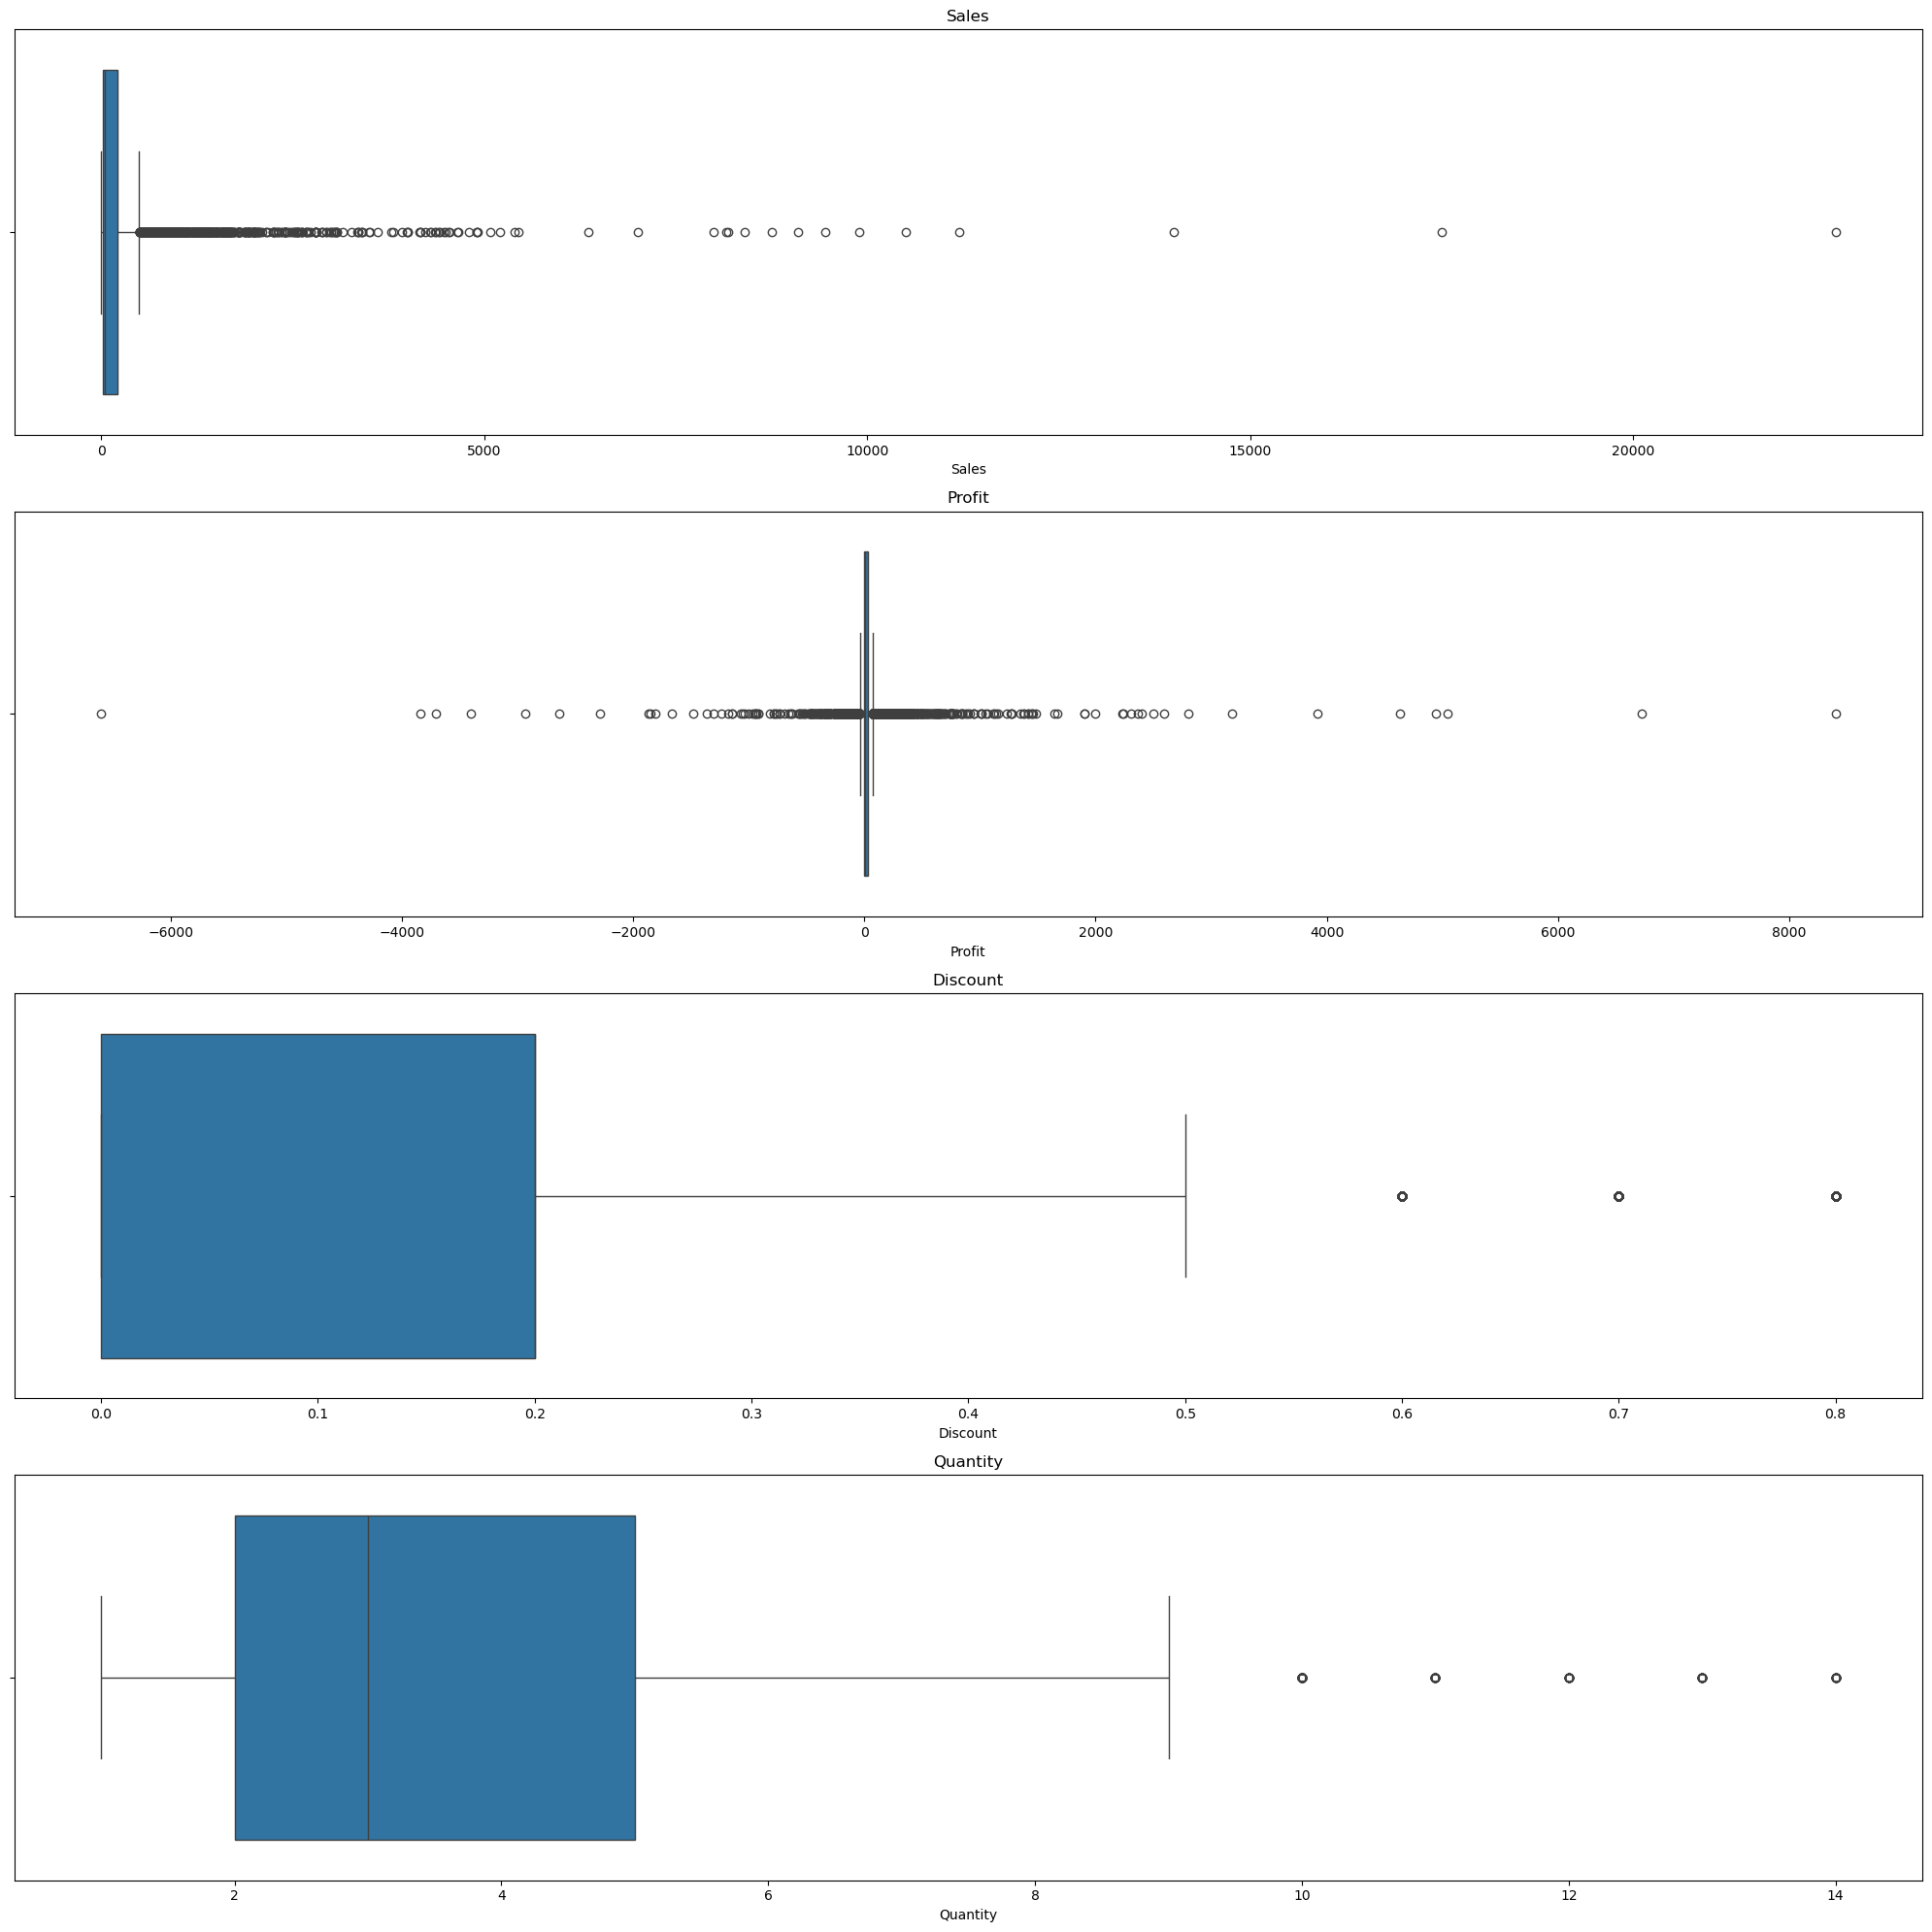

In [26]:
# Boxplot (for numerical variables)

feature = ['Sales', 'Profit', 'Discount', 'Quantity']
plt.figure(figsize=(20, 20))

for idx, col in enumerate(feature, start=1):
    plt.subplot(4, 1, idx)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()

In [27]:
num_cols = ['Sales', 'Profit', 'Quantity', 'Discount', 'Profit Margin','Price Per Unit']
outlier_summary = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    below_lower = df[df[col] < lower_bound]
    above_upper = df[df[col] > upper_bound]
    
    n_below = len(below_lower)
    n_above = len(above_upper)
    n_outliers = n_below + n_above
    percent_outliers = round(100 * n_outliers/len(df), 2)


    outlier_summary.append({
        'Variable': col,
        'Q1': round(Q1, 2),
        'Q2': round(Q2, 2),
        'Q3': round(Q3, 2),
        'IQR': Q3 - Q1,
        'Lower Bound': round(lower_bound, 2),
        'Upper Bound': round(upper_bound, 2),
        'n Below Lower': n_below,
        'n Above Upper': n_above,
        'n Outliers': n_outliers,
        '% Outliers': percent_outliers
})

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

Variable     Q1     Q2      Q3        IQR  Lower Bound  Upper Bound  \
0           Sales  17.28  54.49  209.94  192.66000      -271.71       498.93   
1          Profit   1.73   8.67   29.36   27.63525       -39.72        70.82   
2        Quantity   2.00   3.00    5.00    3.00000        -2.50         9.50   
3        Discount   0.00   0.20    0.20    0.20000        -0.30         0.50   
4   Profit Margin   7.50  27.00   36.25   28.75000       -35.62        79.38   
5  Price Per Unit   6.48  19.98   76.98   70.50000       -99.27       182.73   

   n Below Lower  n Above Upper  n Outliers  % Outliers  
0              0           1167        1167       11.68  
1            604           1277        1881       18.82  
2              0            170         170        1.70  
3              0            856         856        8.57  
4            952              0         952        9.53  
5              0           1026        1026       10.27

#### **Summary**
Based on the outlier analysis conducted using the interquartile range (IQR) method, the following conclusions can be drawn from the AWS SaaS sales dataset:

**1. Sales**\
   The first quartile (Q1) was 17.28, the median (Q2) was 54.49, and the third quartile (Q3) was 209.94, resulting in an IQR of 192.66. The lower and upper bounds were calculated as −271.71 and 498.93, respectively. No transactions fell below the lower bound, while 1,167 exceeded the upper bound, accounting for 11.68% of all observations. This suggests a substantial number of exceptionally high-value SaaS transactions, likely reflecting enterprise-level deals or bundled services offered at scale. The right-skewed distribution highlights the presence of high-revenue outliers that may disproportionately influence aggregate analyses. 
   
**2. Profit**\
   The quartile values for Profit were Q1 = 1.73, Q2 = 8.67, and Q3 = 29.36, with an IQR of 27.64. The lower and upper bounds were −39.72 and 70.82, respectively. A total of 604 transactions had profits below the lower bound, while 1,277 exceeded the upper bound, yielding 1,881 outliers in total (18.82% of the dataset). This large proportion of both low and high profit values indicates substantial variation in profit margins across SaaS transactions. Some may represent discounted or promotional offerings resulting in negative margins, while others may reflect high-profit subscriptions or successful upselling strategies.
   
**3. Quantity**\
   For Quantity, the quartile values were Q1 = 2.00, Q2 = 3.00, and Q3 = 5.00, giving an IQR of 3.00. The lower and upper bounds were calculated as −2.50 and 9.50, respectively. No observations were found below the lower bound, but 170 exceeded the upper bound, representing 1.70% of the data. These findings suggest that most SaaS transactions involved small to moderate quantities, with a small subset reflecting bulk purchases, likely from larger organizational clients.
   
**4. Discount**\
   The Discount variable showed both Q1 and Q3 at 0.20, with the median (Q2) also at 0.20, resulting in an IQR of 0.20. The lower and upper bounds were −0.30 and 0.50. No values fell below the lower bound, while 856 transactions exceeded the upper bound, comprising 8.57% of the data. The consistency in quartile values points to the use of standardized discounting practices. However, the presence of outliers above the upper limit indicates that some customers received significantly larger discounts, potentially through negotiation, custom contracts, or enterprise-level pricing agreements.

**5. Profit Margin**\
    The quartile values for Profit Margin were Q1 = 7.50, Q2 = 27.00, and Q3 = 36.25, producing an IQR of 28.75. The lower and upper bounds were calculated as −35.62 and 79.38, respectively. A total of 952 transactions had values below the lower bound, with none above the upper bound, resulting in 9.53% outliers. These findings suggest that although most transactions maintain a positive profit margin, a notable portion experienced substantially negative margins—likely due to excessive discounting.

**6. Price Per Unit**\
    For Price Per Unit, Q1 was 6.48, Q2 was 19.98, and Q3 was 76.98, yielding an IQR of 70.50. The lower bound was −99.27, and the upper bound was 182.73. No observations fell below the lower bound, while 1,026 exceeded the upper limit, accounting for 10.27% of all records. This reflects a significant number of high-priced products, possibly indicating premium SaaS offerings, advanced feature sets, or enterprise-level licensing structures. 
    
In conclusion, the AWS SaaS sales dataset displays a concentration of high-end outliers, particularly in sales and profit. The observed variability in profit margins reflects heterogeneous pricing strategies and customer behaviors. Meanwhile, outliers in quantity and discount are less frequent but still suggest the presence of high-volume transactions and special pricing terms. 

### **Outliers Handling**

**Outliers were retained** in this analysis for two main reasons. First, the proportion of outliers identified, particularly in the sales and profit variables, is considerable. Removing such a large number of observations risks distorting the dataset and compromising the representativeness of the findings. Given that the objective of this analysis is exploratory and intended to inform business reporting, rather than predictive modeling or machine learning, preserving the full range of values allows for a more accurate reflection of operational realities.

Second, as mentioned above, the outliers are reasonable in the context of AWS SaaS. Very high sales values likely result from large enterprise purchases or bundled services. Outliers in profit may reflect pricing differences, discounts, contract sizes, or other promotional strategies, all of which can contribute to a wide profit range. High quantity values suggest bulk purchases by institutional clients, while outliers above the upper bound in discount may result from special deals, time-limited promotions, or negotiated pricing agreements. Similarly, extreme values in profit margin may indicate cases of unusually low or negative profitability due to strategic discounting. Outliers in price per unit likely correspond to premium offerings or customized packages sold at higher rates.

Overall, **the outliers in this dataset are not anomalies to be removed**, but rather key indicators of business variability and operational scale. Excluding them would diminish the integrity and utility of the analysis, particularly given its function as a descriptive report rather than a modeling pipeline.

---

# **D. Data Analysis**

## **Goal 1**
Identify the distribution of transactions by profit category (positive vs. negative) and sales category to understand the overall profitability and sales structure of AWS SaaS sales.

### **Normality Test**

In [28]:
from scipy.stats import kstest

for col in num_cols:
    stats, p_value = kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    
    if p_value > 0.05:
        print(f'{col}: p-value = {p_value:.2f} → The data are normally distributed')
    else:
        print(f'{col}: p-value = {p_value:.2f} → The data are not normally distributed')

Sales: p-value = 0.00 → The data are not normally distributed
Profit: p-value = 0.00 → The data are not normally distributed
Quantity: p-value = 0.00 → The data are not normally distributed
Discount: p-value = 0.00 → The data are not normally distributed
Profit Margin: p-value = 0.00 → The data are not normally distributed
Price Per Unit: p-value = 0.00 → The data are not normally distributed


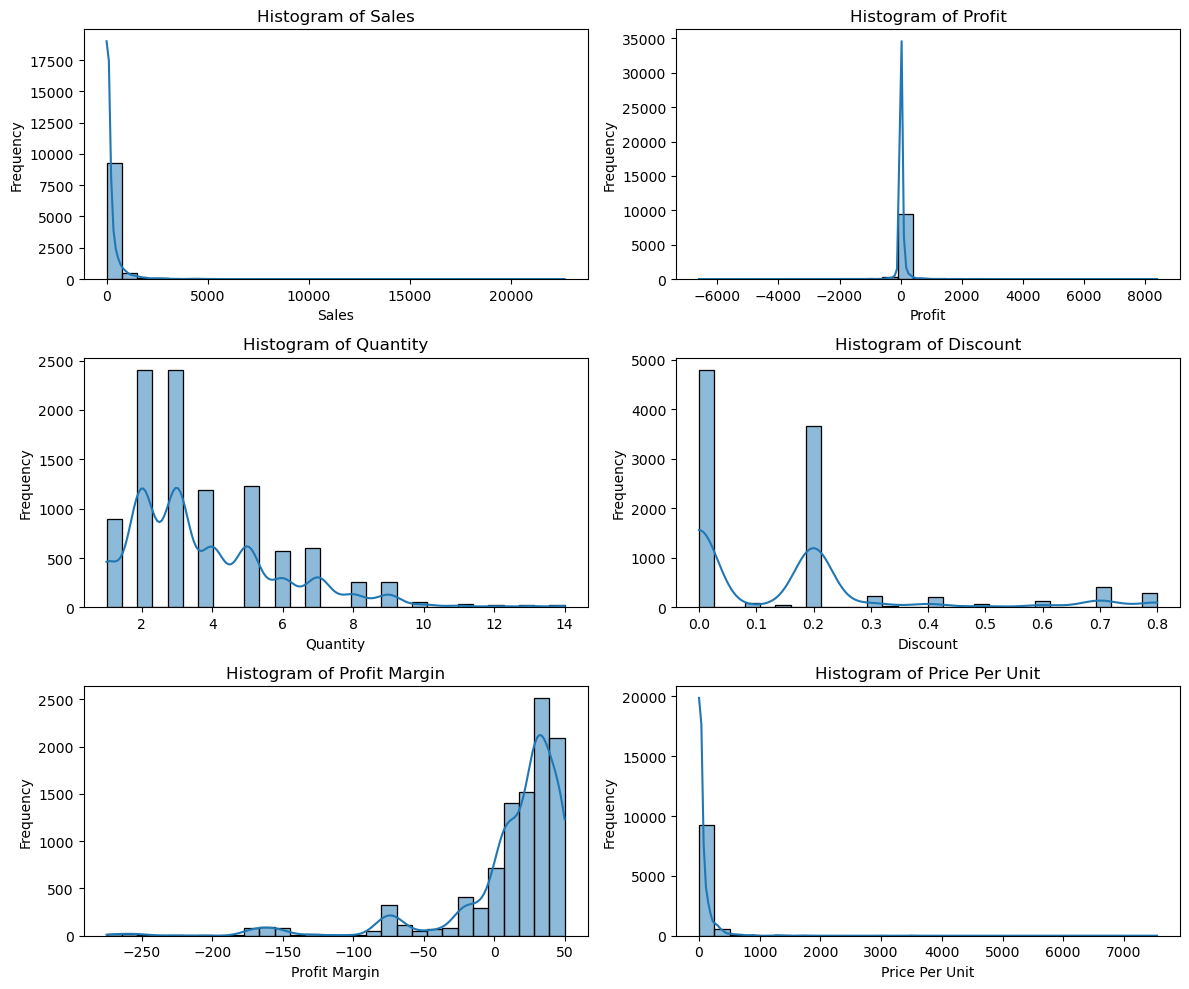

In [29]:
# Normality Test Visualization With Histogram
plt.figure(figsize=(12, 10))

for idx, col in enumerate(num_cols, start=1):
    plt.subplot(3, 2, idx)  
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()

**Conclusion**\
All numeric variables, including sales, profit, quantity, discount, profit margin, and price per unit, were found to be non-normally distributed. Consequently, **median** values were used for data aggregation and **non-parametric statistical methods** were employed for hypothesis testing to ensure the validity of analytical inferences.

### **Profit Distribution**

In [143]:
df_profit_cat_summary = df_clean.groupby('Profit 3 Cat').agg(
    Total_Transactions=('Profit', 'count'),
    Total_Profit=('Profit', 'sum'),
    Median_Profit=('Profit', 'median')
).reset_index()

df_profit_cat_summary

Profit 3 Cat  Total_Transactions  Total_Profit  Median_Profit
0     Negative                1871  -156131.2857       -18.0882
1     Positive                8058   442528.3074        13.3176
2         Zero                  65        0.0000         0.0000

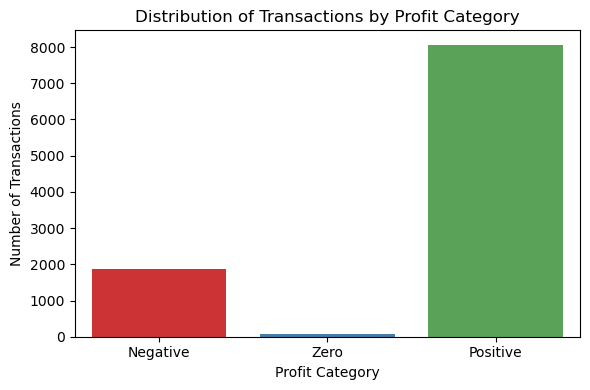

In [131]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='Profit 3 Cat', order=['Negative', 'Zero', 'Positive'], palette='Set1')
plt.title('Distribution of Transactions by Profit Category')
plt.xlabel('Profit Category')
plt.ylabel('Number of Transactions')
plt.tight_layout()

In [134]:
# Compare descriptive stats: Negative vs. Positive profit
neg_stats = df_clean[df_clean['Profit 3 Cat'] == 'Negative'][['Profit', 'Sales', 'Discount', 'Quantity']].describe().T
pos_stats = df_clean[df_clean['Profit 3 Cat'] == 'Positive'][['Profit', 'Sales', 'Discount', 'Quantity']].describe().T

# Tambahkan kolom untuk kategori
neg_stats['Category'] = 'Negative Profit'
pos_stats['Category'] = 'Positive Profit'

# Gabungkan
combined_stats = pd.concat([neg_stats, pos_stats])
display(combined_stats)

count        mean         std        min       25%      50%  \
Profit    1871.0  -83.448042  284.423422 -6599.9780 -58.66095 -18.0882   
Sales     1871.0  250.511574  715.067296     0.4440  12.50300  71.0880   
Discount  1871.0    0.480887    0.235080     0.1000   0.20000   0.4000   
Quantity  1871.0    3.762694    2.141347     1.0000   2.00000   3.0000   
Profit    8058.0   54.917884  213.713980     0.0628   5.32455  13.3176   
Sales     8058.0  223.480623  600.340641     0.9900  17.94000  50.9650   
Discount  8058.0    0.081044    0.098884     0.0000   0.00000   0.0000   
Quantity  8058.0    3.794738    2.244696     1.0000   2.00000   3.0000   

                75%         max         Category  
Profit     -6.26150     -0.0895  Negative Profit  
Sales     284.92200  22638.4800  Negative Profit  
Discount    0.70000      0.8000  Negative Profit  
Quantity    5.00000     14.0000  Negative Profit  
Profit     40.46555   8399.9760  Positive Profit  
Sales     191.97600  17499.9500  Positive Profit  
Discount    0.20000      0.4000  Positive Profit  
Quantity    5.00000     14.0000  Positive Profit

**Insight**
1. Profit
   The median profit in negative-profit transactions is −18.09, indicating that the typical loss is moderate, while positive-profit transactions show a median profit of 13.32, reflecting a clear distinction in central profitability between the two groups.

2. Sales
    The median sales value in transactions with negative profit is 71.09, which is higher than the median in positive-profit transactions (50.97). This suggests that greater sales value does not necessarily lead to positive profit.

3. Discount
    Negative-profit transactions have a median discount of 40%, compared to 0% in positive-profit ones. This stark contrast indicates that discounting is a critical factor contributing to unprofitable sales.

4. Quantity
    The median quantity is identical across both groups at 3 units, suggesting that quantity sold has minimal influence on whether a transaction is profitable or not.

### **Profit Distribution by Product**

In [139]:
# Count number of transactions per profit category (Negative, Zero, Positive) for each product
product_profit_dist = df_clean.groupby(['Product', 'Profit 3 Cat']).size().unstack(fill_value=0)

# Ensure consistent column order
product_profit_dist = product_profit_dist.reindex(columns=['Negative', 'Zero', 'Positive'], fill_value=0)

# Calculate total transactions per product
product_profit_dist['Total Transactions'] = product_profit_dist.sum(axis=1)

# Calculate percentage of each profit category
product_profit_dist['% Negative'] = round((product_profit_dist['Negative'] / product_profit_dist['Total Transactions']) * 100, 2)
product_profit_dist['% Zero'] = round((product_profit_dist['Zero'] / product_profit_dist['Total Transactions']) * 100, 2)
product_profit_dist['% Positive'] = round((product_profit_dist['Positive'] / product_profit_dist['Total Transactions']) * 100, 2)

# Reset index to flatten the DataFrame (only 'Product' becomes a column)
df_profit = product_profit_dist.reset_index()

# Reorder columns
ordered_cols = [
    'Product',
    'Negative', '% Negative',
    'Positive', '% Positive',
    'Zero', '% Zero',
    'Total Transactions'
]
df_profit = df_profit[ordered_cols]

# Sort by number of negative-profit transactions
df_profit = df_profit.sort_values(by='Negative', ascending=False).reset_index(drop=True)

# Display the final DataFrame
df_profit

Profit 3 Cat                     Product  Negative  % Negative  Positive  \
0                         ContactMatcher       816       44.30      1024   
1                             FinanceHub       235       23.96       726   
2                    SaaS Connector Pack       167       17.45       781   
3                 Marketing Suite - Gold       161       19.03       661   
4                         Site Analytics       136       15.30       751   
5                        Marketing Suite       109       47.81       117   
6                           Data Smasher        91       11.74       683   
7                                OneView        67       14.38       399   
8                        Big Ol Database        44       38.26        71   
9                                Support        33        2.12      1527   
10                               Storage        12        5.53       200   
11                               Alchemy         0        0.00        68   
12                        ChatBot Plugin         0        0.00       796   
13            SaaS Connector Pack - Gold         0        0.00       254   

Profit 3 Cat  % Positive  Zero  % Zero  Total Transactions  
0                  55.59     2    0.11                1842  
1                  74.01    20    2.04                 981  
2                  81.61     9    0.94                 957  
3                  78.13    24    2.84                 846  
4                  84.48     2    0.22                 889  
5                  51.32     2    0.88                 228  
6                  88.13     1    0.13                 775  
7                  85.62     0    0.00                 466  
8                  61.74     0    0.00                 115  
9                  97.88     0    0.00                1560  
10                 92.17     5    2.30                 217  
11                100.00     0    0.00                  68  
12                100.00     0    0.00                 796  
13                100.00     0    0.00                 254

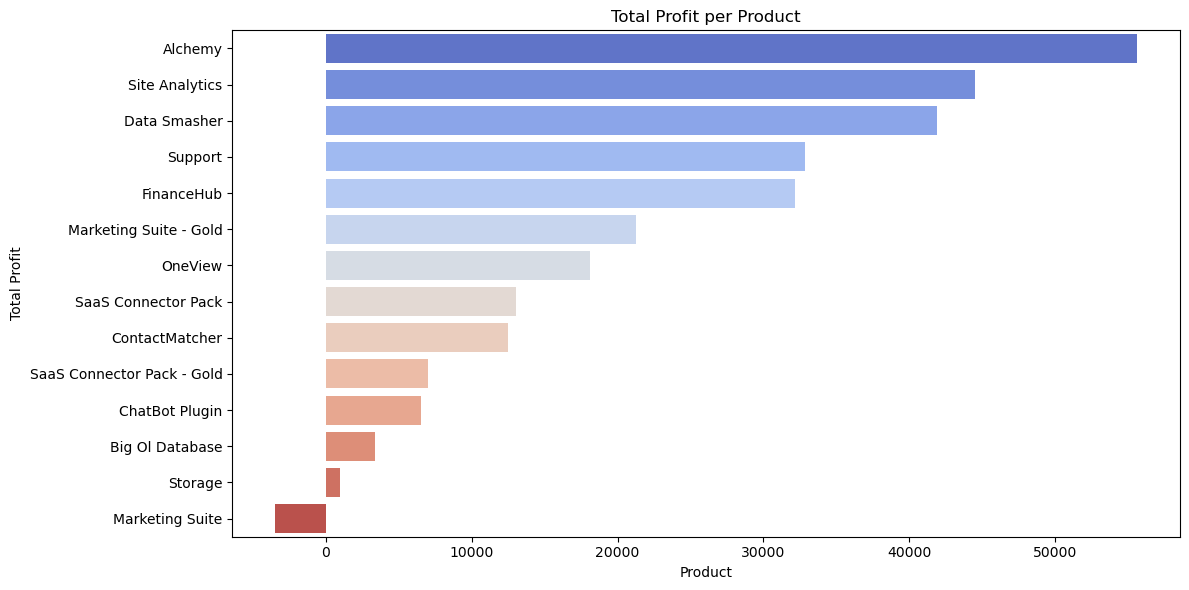

In [162]:
# Visualization of Total Profit per Procuct
plt.figure(figsize=(12, 6))
sns.barplot(data=product_stats, x='Total_Profit', y='Product', palette=sns.color_palette("coolwarm", n_colors=len(product_stats)))
plt.title('Total Profit per Product')
plt.ylabel('Total Profit')
plt.xlabel('Product')
plt.tight_layout()

**Insight**
1. High-Risk Products
Marketing Suite (47.81%) and ContactMatcher (44.30%) exhibit the highest proportion of transactions resulting in negative profit. These figures suggest significant challenges in maintaining profitability despite potentially strong sales performance. Big Ol Database also shows a notable proportion of negative profit transactions (38.26%), despite a relatively low total transaction count.

2. Consistently Profitable Products
ChatBot Plugin, Alchemy, and SaaS Connector Pack – Gold demonstrate perfect profit performance, with 100% of transactions yielding positive profit and zero losses recorded. Similarly, Support (97.88% positive) and Storage (92.17% positive) maintain high profitability with minimal loss incidence.

3. High Transaction Volume with Profitability Concerns
ContactMatcher, the product with the highest transaction count (n = 1,842), also records one of the highest percentages of negative profit. This indicates that high transaction volume alone does not guarantee positive financial outcomes and may, in fact, mask underlying pricing or discount-related inefficiencies.

4. Products with Balanced Profitability Outcomes
Marketing Suite presents a near-equal distribution between negative (47.81%) and positive (51.32%) profit transactions, suggesting unstable or unpredictable financial returns. Such cases merit further analysis of associated factors, such as customer segmentation, pricing models, and promotional strategies.

<Figure size 1600x1000 with 0 Axes>

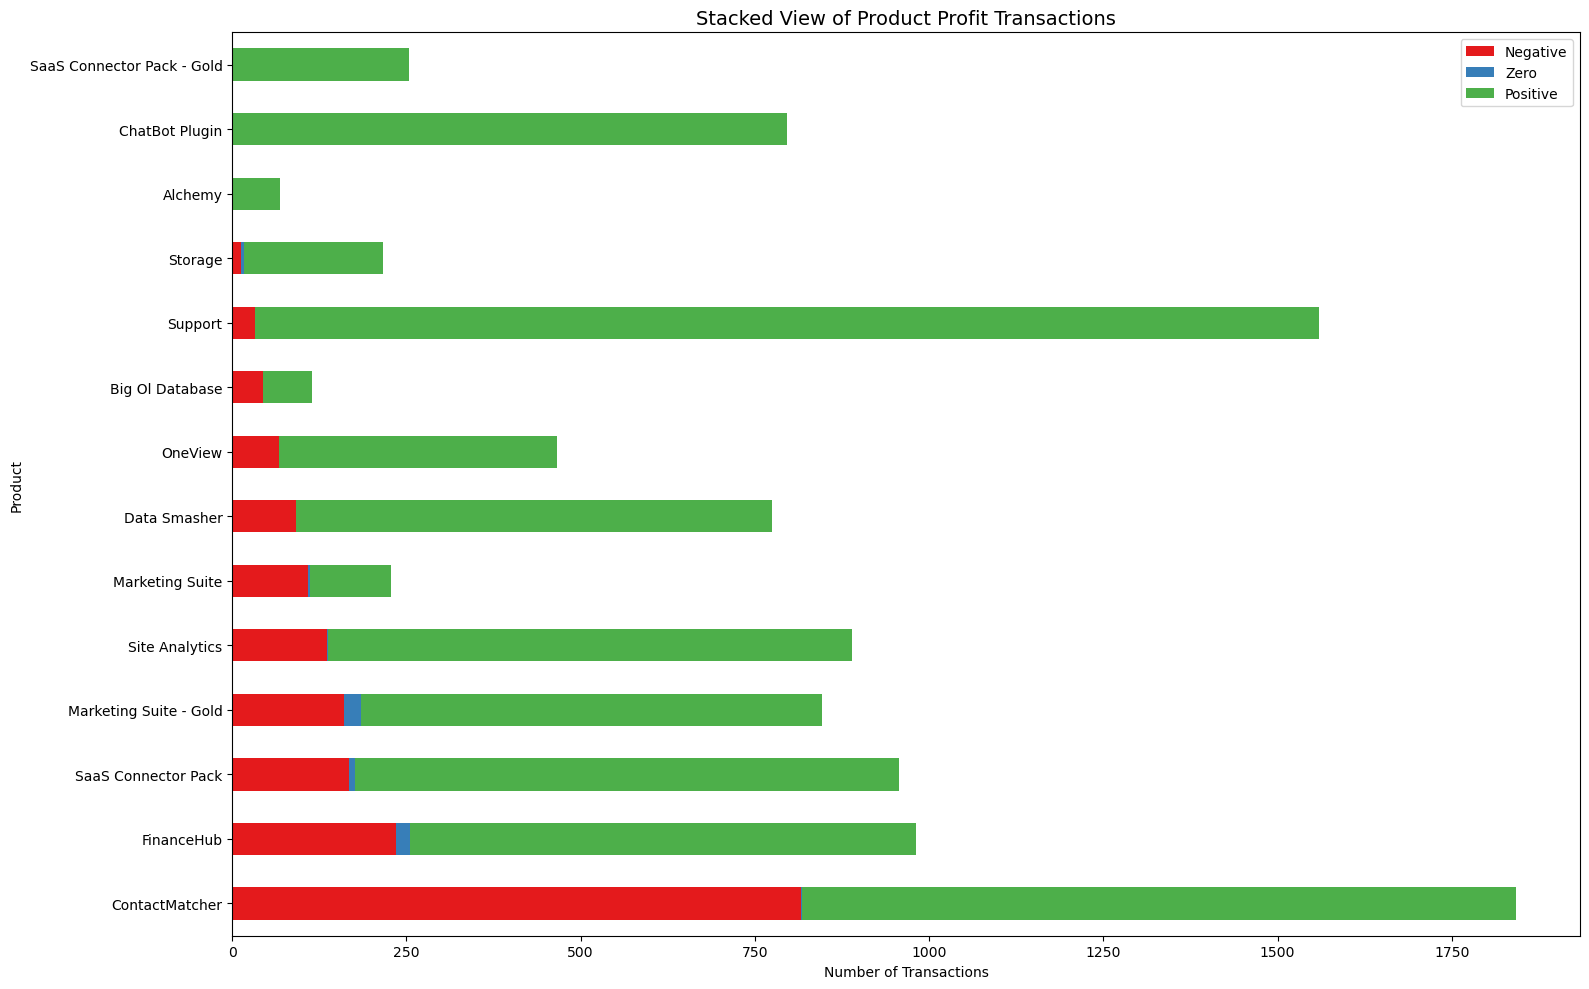

In [142]:
# Visualization with stacked plot
stacked_data = df_profit.set_index('Product')[['Negative', 'Zero', 'Positive']]
plt.figure(figsize=(16, 10))

colors = sns.color_palette("Set1")
stacked_data.plot(kind='barh', stacked=True, 
                 color=colors,
                 figsize=(16, 10))
plt.title('Stacked View of Product Profit Transactions', fontsize=14)
plt.xlabel('Number of Transactions')
plt.ylabel('Product')
plt.legend(['Negative', 'Zero', 'Positive'])
plt.tight_layout()

### **Sales Distribution**

In [148]:
df_sales_cat_summary = df_clean.groupby('Sales Cat').agg(
    Total_Transactions=('Sales', 'count'),
    Total_Profit=('Sales', 'sum'),
    Median_Profit=('Sales', 'median')
).reset_index()

df_sales_cat_summary

Sales Cat  Total_Transactions  Total_Profit  Median_Profit
0      High                2498  1.912578e+06        475.944
1       Low                2498  2.328017e+04          9.308
2  Moderate                4998  3.613424e+05         54.490

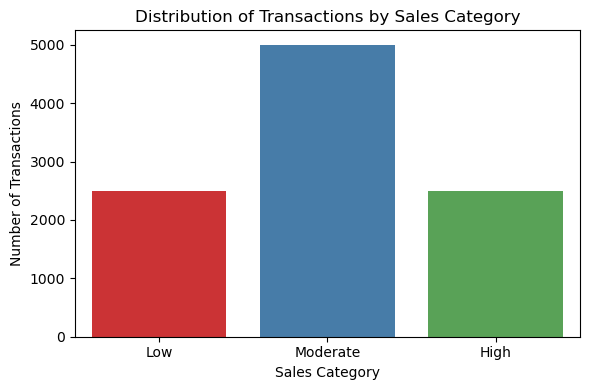

In [149]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='Sales Cat', order=['Low', 'Moderate', 'High'], palette='Set1')
plt.title('Distribution of Transactions by Sales Category')
plt.xlabel('Sales Category')
plt.ylabel('Number of Transactions')
plt.tight_layout()

In [147]:
# Count the number of transactions per product for each sales category
sales_counts = df_clean.groupby(['Product', 'Sales Cat']).size().unstack(fill_value=0).reset_index()

# Rename columns if needed
sales_counts.columns.name = None 
sales_counts = sales_counts.rename(columns={
    'Low': 'Low',
    'Moderate': 'Moderate',
    'High': 'High'
})

# Calculate total number of transactions per product
sales_counts['Total Transactions'] = sales_counts[['Low', 'Moderate', 'High']].sum(axis=1)

# Calculate percentage of transactions per category
sales_counts['% Low'] = round((sales_counts['Low'] / sales_counts['Total Transactions']) * 100, 2)
sales_counts['% Moderate'] = round((sales_counts['Moderate'] / sales_counts['Total Transactions']) * 100, 2)
sales_counts['% High'] = round((sales_counts['High'] / sales_counts['Total Transactions']) * 100, 2)

# Reorder columns for clarity
ordered_cols = [
    'Product',
    'Low', '% Low',
    'Moderate', '% Moderate',
    'High', '% High',
    'Total Transactions'
]
df_sales = sales_counts[ordered_cols]

# Sort by number of Low category transactions in descending order
df_sales = df_sales.sort_values(by='Low', ascending=False).reset_index(drop=True)

# Display the resulting table
df_sales

Product  Low  % Low  Moderate  % Moderate  High  \
0               ContactMatcher  711  38.60       743       40.34   388   
1                      Support  505  32.37       956       61.28    99   
2               ChatBot Plugin  433  54.40       351       44.10    12   
3          SaaS Connector Pack  212  22.15       632       66.04   113   
4                   FinanceHub  201  20.49       337       34.35   443   
5                      Storage  159  73.27        58       26.73     0   
6   SaaS Connector Pack - Gold   82  32.28       155       61.02    17   
7       Marketing Suite - Gold   58   6.86       470       55.56   318   
8                      OneView   57  12.23       284       60.94   125   
9                 Data Smasher   41   5.29       518       66.84   216   
10              Site Analytics   37   4.16       407       45.78   445   
11             Big Ol Database    2   1.74        17       14.78    96   
12                     Alchemy    0   0.00         0        0.00    68   
13             Marketing Suite    0   0.00        70       30.70   158   

    % High  Total Transactions  
0    21.06                1842  
1     6.35                1560  
2     1.51                 796  
3    11.81                 957  
4    45.16                 981  
5     0.00                 217  
6     6.69                 254  
7    37.59                 846  
8    26.82                 466  
9    27.87                 775  
10   50.06                 889  
11   83.48                 115  
12  100.00                  68  
13   69.30                 228

**Insight**
1. ContactMatcher records the highest total transactions (1,842) among all products, with the largest number of Low Sales transactions (711), indicating it's widely sold but often at a lower sales level—possibly due to aggressive pricing or broad market targeting.

2. Support also has high overall sales (1,560 transactions), but the majority falls into the Moderate category (61.28%), suggesting it's positioned more toward mid-tier buyers.

3. ChatBot Plugin is notably skewed: over half of its transactions (54.4%) fall into the Low Sales category, with very few High Sales (only 12 out of 796). This suggests it's a lower-revenue product, despite moderate popularity in volume.

4. FinanceHub, Site Analytics, and Marketing Suite tend to dominate in the High Sales category, implying these are likely premium offerings with stronger per-transaction value.

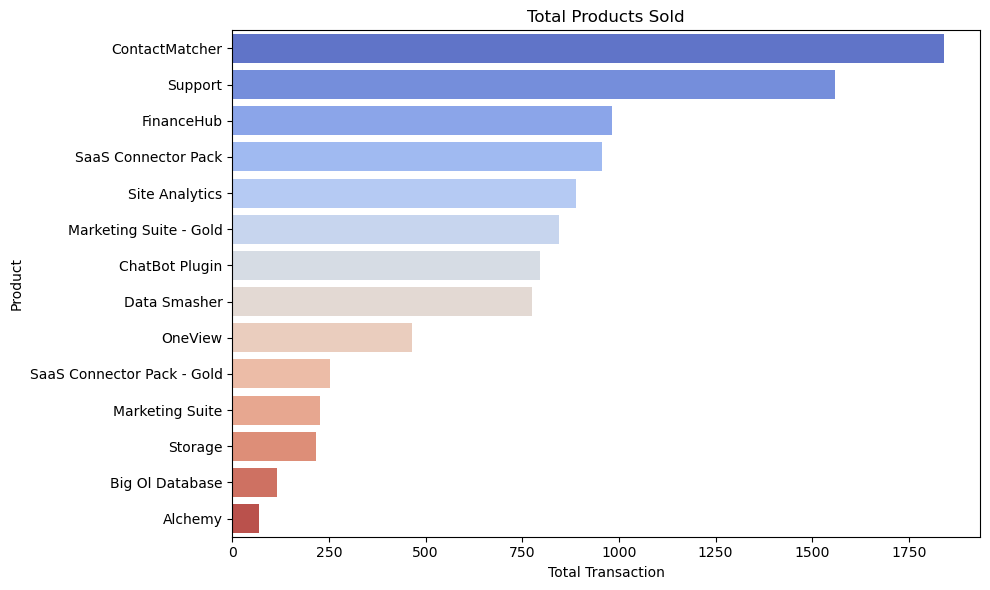

In [163]:
# Visualization of Total Product Sold
product_sold = product_stats.sort_values(by='Transaction_Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=product_sold, x='Transaction_Count', y='Product', palette=sns.color_palette("coolwarm", n_colors=len(product_stats)))
plt.title('Total Products Sold')
plt.xlabel('Total Transaction')
plt.ylabel('Product')
plt.tight_layout()

<Figure size 1600x1000 with 0 Axes>

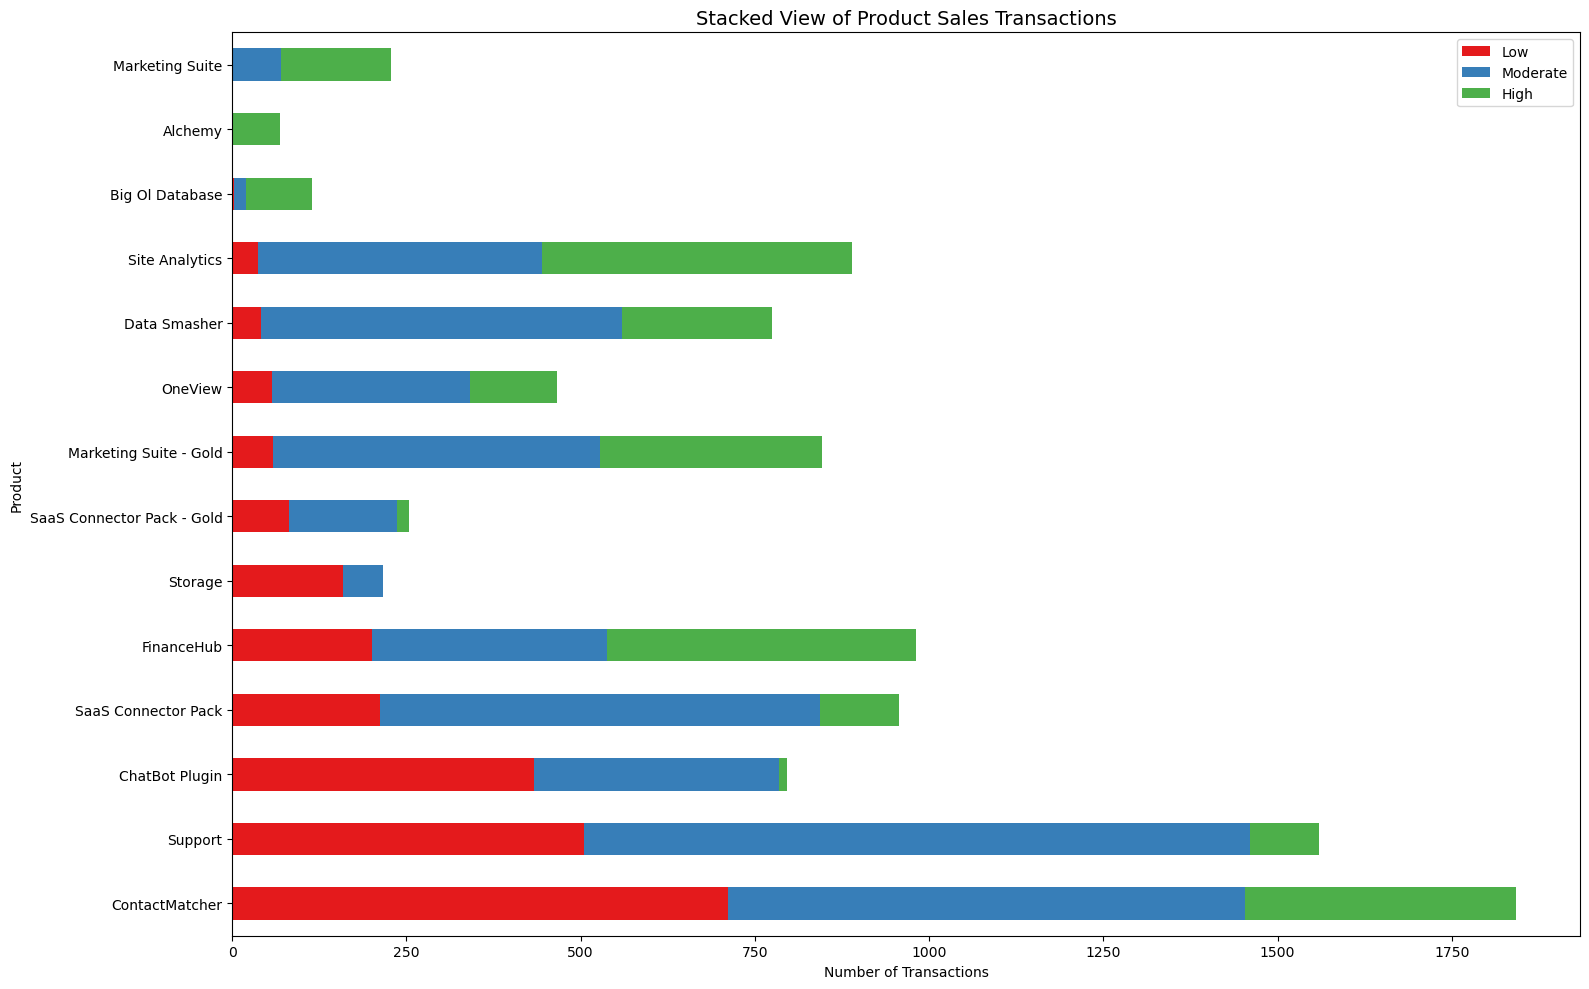

In [151]:
# Visualization with stacked plot
stacked_data = df_sales.set_index('Product')[['Low', 'Moderate', 'High']]
plt.figure(figsize=(16, 10))

colors = sns.color_palette("Set1")
stacked_data.plot(kind='barh', stacked=True, 
                 color=colors,
                 figsize=(16, 10))
plt.title('Stacked View of Product Sales Transactions', fontsize=14)
plt.xlabel('Number of Transactions')
plt.ylabel('Product')
plt.legend(['Low', 'Moderate', 'High'])
plt.tight_layout()

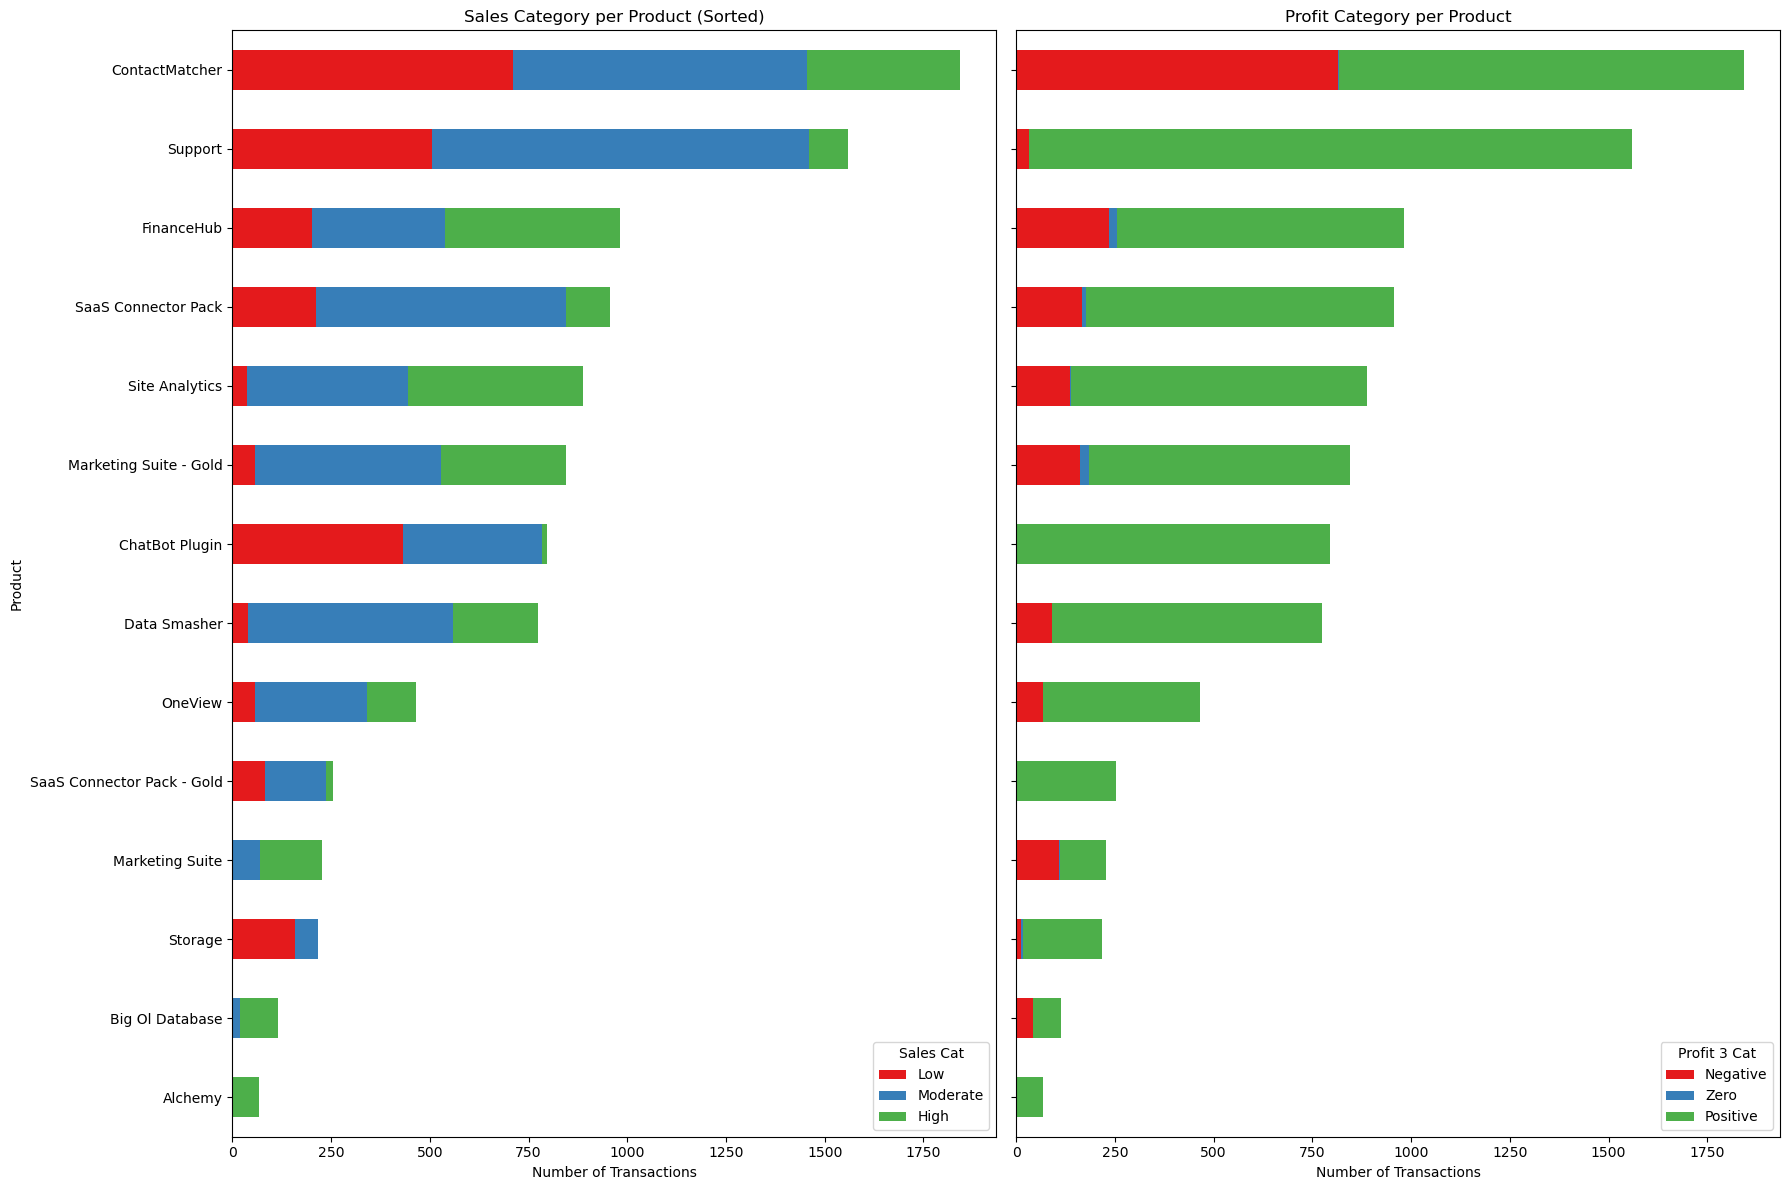

In [161]:
# Define consistent category orders
sales_order = ['Low', 'Moderate', 'High']
profit_order = ['Negative', 'Zero', 'Positive']

# Crosstab with consistent column order
sales_by_product = pd.crosstab(df_clean['Product'], df_clean['Sales Cat'])[sales_order]
profit_by_product = pd.crosstab(df_clean['Product'], df_clean['Profit 3 Cat'])[profit_order]

# Sort by total sales (descending)
sorted_index = sales_by_product.sum(axis=1).sort_values().index
sales_by_product = sales_by_product.loc[sorted_index]
profit_by_product = profit_by_product.loc[sorted_index]

# Plot side-by-side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 12), sharey=True)

# Sales barh
sales_by_product.plot(
    kind='barh',
    stacked=True,
    ax=axes[0],
    color=sns.color_palette("Set1", n_colors=3)
)
axes[0].set_title('Sales Category per Product (Sorted)')
axes[0].set_xlabel('Number of Transactions')
axes[0].set_ylabel('Product')
axes[0].legend(title='Sales Cat')

# Profit barh
profit_by_product.plot(
    kind='barh',
    stacked=True,
    ax=axes[1],
    color=sns.color_palette("Set1", n_colors=3)
)
axes[1].set_title('Profit Category per Product')
axes[1].set_xlabel('Number of Transactions')
axes[1].set_ylabel('')
axes[1].legend(title='Profit 3 Cat')

plt.tight_layout()
plt.show()

**Conclusion**
1. ContactMatcher recorded the highest transaction volume, with the majority of its sales falling into the Low Sales category. Despite the lower sales per transaction, the product consistently generated positive profit outcomes. This suggests that its profitability is driven by high transaction frequency rather than individual sale value, positioning it as a key product for sustaining cash flow through volume-based performance.

2. ChatBot Plugin also demonstrated a dominant presence in the Low Sales category, yet nearly all of its transactions resulted in positive profit. This pattern indicates strong cost-efficiency and operational effectiveness, making it well-suited for deployment at scale in price-sensitive markets. The product exemplifies a low-cost, high-impact solution.

3. Support & Marketing Suite showed strong performance in both Moderate and High Sales categories, with an overwhelmingly positive profit margin across transactions. This consistent profitability across a range of sales values suggests it is a reliable contributor to overall revenue, reinforcing its role as a core offering within the product portfolio.

4. Alchemy and SiteAnalytics, though exhibiting lower transaction volumes, were concentrated in the High Sales category and consistently yielded positive profit. This implies a strategic positioning toward premium or enterprise-level clients, with each transaction contributing substantial value. These products are likely crucial for capturing high-margin market segments.

#### **Goal 1**
Identify the distribution of transactions by profit category (positive vs. negative) and sales category to understand the overall profitability and sales structure of AWS SaaS sales.

#### **Answer**
The distribution of AWS SaaS transactions reveals that **most sales fall under the Low Sales category, yet still generate predominantly Positive Profit outcomes**. This is evident in products such as ContactMatcher and ChatBot Plugin, which show high transaction volumes despite low per-unit sales, but consistently yield positive profit margins. In contrast, the **High Sales category**, represented by products like Alchemy and SiteAnalytics, **exhibits fewer transactions but contributes significantly to total and median profit (USD 1.91 million and USD 475.94, respectively)**, indicating a premium pricing strategy.

**Overall, the profitability structure reflects a dual-path model: high-volume, low-value products contribute through scale, while high-value products enhance profitability through per-transaction margins.**

---

## **Goal 2**
Analyze sales and profit trends over time to identify potential seasonality and long-term performance shifts

#### **Sales and Profit Trends Over Time**

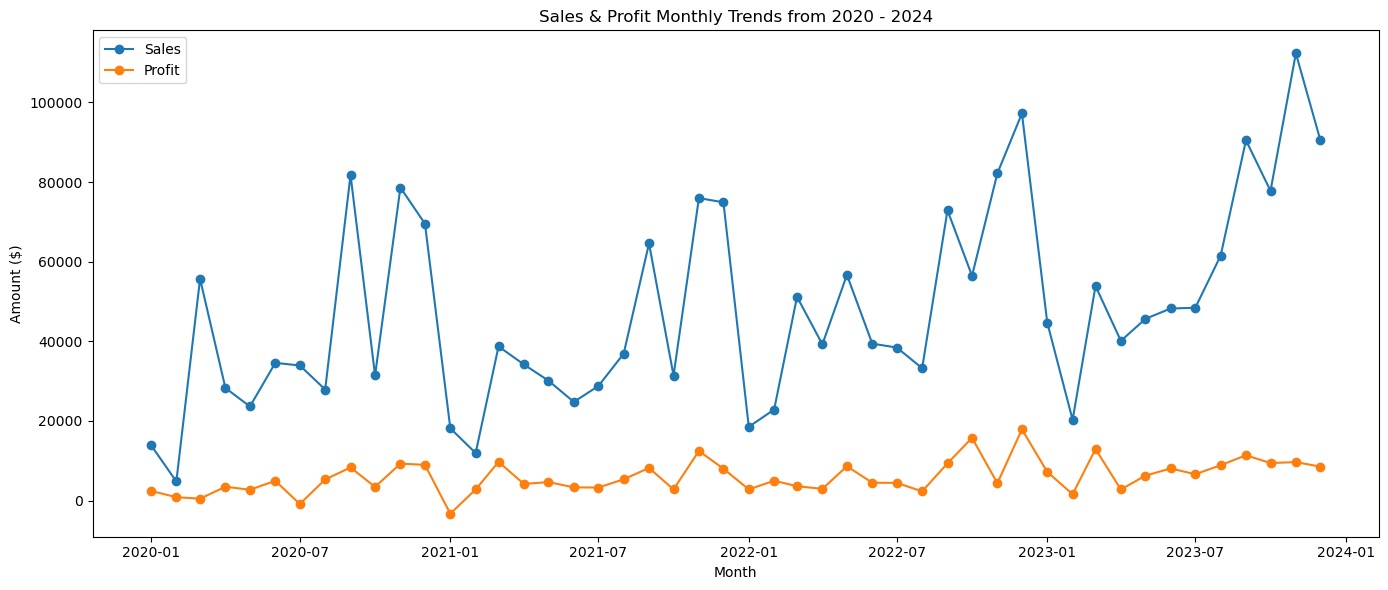

In [30]:
# Time Extractions
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.to_period('Q')

# Monthly Agg
monthly_trend = df.groupby(df['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()
monthly_trend['Order Date'] = monthly_trend['Order Date'].dt.to_timestamp()

# Yearly Agg
yearly_trend = df.groupby('Year').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Lineplot Sales & Profit Monthly Trends Over Time
plt.figure(figsize=(14, 6))
plt.plot(monthly_trend['Order Date'], monthly_trend['Sales'], marker='o', label='Sales')
plt.plot(monthly_trend['Order Date'], monthly_trend['Profit'], marker='o', label='Profit')
plt.title('Sales & Profit Monthly Trends from 2020 - 2024')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.tight_layout()

**Insight**\
The time series visualization from 2020 to 2023 reveals a **persistent divergence between sales and profit trajectories**. While several significant surges in sales are observed throughout the period, the corresponding increases in profit are either marginal or absent, signaling a systemic **inefficiency in translating revenue into profit**. This pattern suggests that sales growth may be driven by mechanisms that erode profit margins, such as aggressive discounting or suboptimal pricing strategies.

**1. Seasonality**
   - **Recurring sales peaks**, particularly in September, November, and December, point to **potential seasonal demand or periodic promotional efforts** (e.g., year-end campaigns).
   - Despite these spikes in revenue, **profit often lags significantly, remaining flat or increasing only modestly**. This indicates that revenue surges are not effectively translating into bottom-line gains, likely due to elevated costs or margin pressures during promotional periods.

**2. Long-term Performance Shift**
- **Sales exhibit a clear upward trajectory over the four-year period**, with accelerated growth especially evident in late 2023, potentially reflecting improved market penetration or successful customer acquisition strategies.
- In contrast, **the profit trend remains relatively stagnant, with only slight upward movement**, suggesting that increased sales volume is not accompanied by proportional improvements in financial performance.

The data underscores a critical issue: **top-line growth is not being mirrored at the bottom line**, raising concerns about the sustainability of current sales strategies

---

## **Goal 3**
Identify key factors contributing to negative profit in AWS SaaS transactions, including sales, discount, quantity, price, profit margin, products, spatial factors (region, subregion, country), and customer type (customer and segment).

### **Bivariate Analysis**
1. Numeric Variables vs Numeric Variables → Spearman Rank
2. Categoric Variables vs Categoric Variables → Chi Square
3. Numeric Variables vs Categoric Variables → Kruskal Wallis

#### **Correlation Between Numeric Variables (Non-Parametric)**

In [164]:
df[num_cols].corr(method='spearman')

Sales    Profit  Quantity  Discount  Profit Margin  \
Sales           1.000000  0.518407  0.327426 -0.056969      -0.200645   
Profit          0.518407  1.000000  0.234491 -0.543350       0.499701   
Quantity        0.327426  0.234491  1.000000 -0.000878       0.000452   
Discount       -0.056969 -0.543350 -0.000878  1.000000      -0.645219   
Profit Margin  -0.200645  0.499701  0.000452 -0.645219       1.000000   
Price Per Unit  0.909919  0.353519 -0.007362  0.108203      -0.353177   

                Price Per Unit  
Sales                 0.909919  
Profit                0.353519  
Quantity             -0.007362  
Discount              0.108203  
Profit Margin        -0.353177  
Price Per Unit        1.000000

Text(0.5, 1.0, 'Spearman Correlation Matrix')

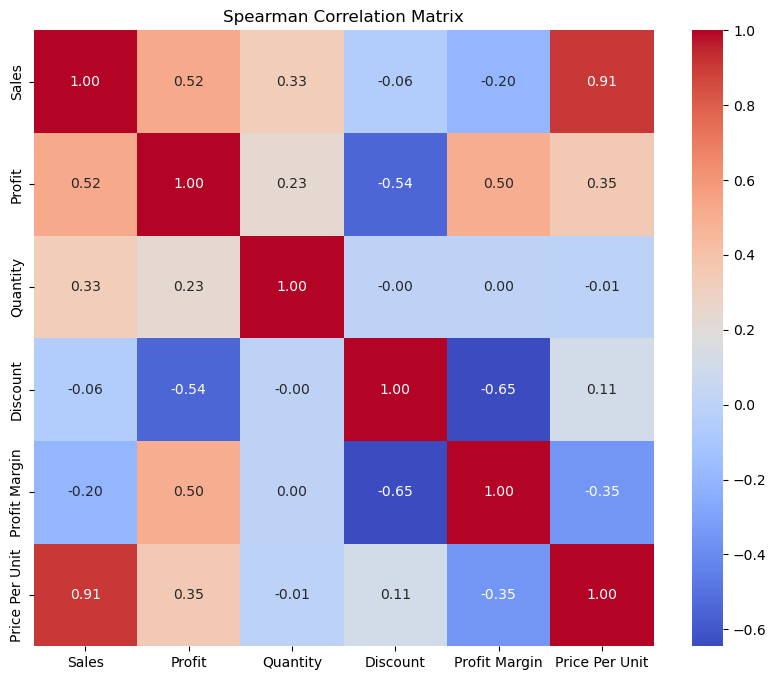

In [165]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')

**Conclusion**
1. **Sales exhibits a strong positive correlation with Price Per Unit** (r = 0.91), indicating that higher-priced products tend to generate higher revenue, independent of quantity.
2. **Profit is positively associated with both Sales** (r = 0.52) **and Price Per Unit** (r = 0.35), suggesting that profitability is more influenced by pricing strategy than sheer transaction volume.
3. **Discount is negatively correlated with Profit** (r = –0.54) **and Profit Margin** (r = –0.65), underscoring the adverse financial implications of high discounting. This inverse relationship suggests that increased discount levels consistently erode both absolute and relative profitability, possibly due to inadequate compensation from increased sales volume.
4. **Quantity has weak correlations with Profit** (r = 0.23), **Sales** (r = 0.33), and virtually **none with Profit Margin or Discount**, implying that the number of units sold plays a relatively minor role in shaping profitability. 
5. **Moderate positive correlation between Profit Margin and Profit** (r = 0.50), and its **negative correlation with Price Per Unit** (r = –0.35), suggests that while high-priced items contribute to absolute profit, they do not always translate into efficient margin performance, especially when paired with discounts.

#### **Chi Square** (Categoric vs Categoric)
- **Dependent Variable: Profit (Profit 2 Cat)**
- Independent Variable:
    - Sales Cat
    - Country
    - Region
    - Subregion
    - Customer
    - Industry
    - Segment
    - Product

In [167]:
from scipy.stats import chi2_contingency

In [168]:
# Profit vs Sales
profit_by_sales = pd.crosstab(df_clean['Sales Cat'], df_clean['Profit 2 Cat'])

stat, p_value, dof, expected = chi2_contingency(profit_by_sales)
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')
p_value

P-value = 0.000 < 0.05, H0 is rejected, there is a significant relationship


np.float64(1.8974162119126195e-24)

In [169]:
# Profit vs Country
profit_by_country = pd.crosstab(df_clean['Country'], df_clean['Profit 2 Cat'])

stat, p_value, dof, expected = chi2_contingency(profit_by_country)
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')
p_value

P-value = 0.000 < 0.05, H0 is rejected, there is a significant relationship


np.float64(0.0)

In [170]:
# Profit vs Region
profit_by_region = pd.crosstab(df_clean['Region'], df_clean['Profit 2 Cat'])

stat, p_value, dof, expected = chi2_contingency(profit_by_region)
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')
p_value

P-value = 0.000 < 0.05, H0 is rejected, there is a significant relationship


np.float64(4.878433474135393e-117)

In [171]:
# Profit vs Subregion
profit_by_subregion = pd.crosstab(df_clean['Subregion'], df_clean['Profit 2 Cat'])

stat, p_value, dof, expected = chi2_contingency(profit_by_subregion)
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')
p_value

P-value = 0.000 < 0.05, H0 is rejected, there is a significant relationship


np.float64(0.0)

In [172]:
# Profit vs Customer
profit_by_customer = pd.crosstab(df_clean['Customer'], df_clean['Profit 2 Cat'])

stat, p_value, dof, expected = chi2_contingency(profit_by_customer)
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')
p_value

P-value = 0.026 < 0.05, H0 is rejected, there is a significant relationship


np.float64(0.02627715169102786)

In [173]:
# Profit vs Industry
profit_by_industry = pd.crosstab(df_clean['Industry'], df_clean['Profit 2 Cat'])

stat, p_value, dof, expected = chi2_contingency(profit_by_industry)
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')
p_value

P-value = 0.313 > 0.05, H0 is accepted, there is NO significant relationship


np.float64(0.3134362380392655)

In [174]:
# Profit vs Segment
profit_by_segment = pd.crosstab(df_clean['Segment'], df_clean['Profit 2 Cat'])

stat, p_value, dof, expected = chi2_contingency(profit_by_segment)
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')
p_value

P-value = 0.205 > 0.05, H0 is accepted, there is NO significant relationship


np.float64(0.20454058542579298)

In [175]:
# Profit vs Produk
profit_by_product = pd.crosstab(df_clean['Product'], df_clean['Profit 2 Cat'])

stat, p_value, dof, expected = chi2_contingency(profit_by_product)
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')
p_value

P-value = 0.000 < 0.05, H0 is rejected, there is a significant relationship


np.float64(0.0)

**Insight**
1. Variables that have a **significant relationship with profit** are:
   - Sales (P-value = 0.000)
   - Country (P-value = 0.000)
   - Region (P-value = 0.000)
   - Subregion (P-value = 0.000)
   - Product (P-value = 0.000)
3. Variables that **do not have a significant relationship** with profit are:
   - Segment (P-value = 0.205)
   - Industry (P-value = 0.313)

#### **Independent T-Test (Categoric vs Numeric)**
- Dependent Variable: Profit Cat
- Independent Variable:
  - Discount
  - Quantity
  - Price per Unit
  - Profit Margin

In [176]:
from scipy.stats import ttest_ind

In [177]:
# Profit vs Discount
profit_by_disc = [df_clean[df_clean['Profit 2 Cat'] == cat]['Discount'] for cat in df_clean['Profit 2 Cat'].unique()]
stat, p_value = ttest_ind(*profit_by_disc)
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')
p_value

P-value = 0.000 < 0.05, H0 is rejected, there is a significant relationship


np.float64(0.0)

In [178]:
# Profit vs Quantity
profit_by_quantity = [df_clean[df_clean['Profit 2 Cat'] == cat]['Quantity'] for cat in df_clean['Profit 2 Cat'].unique()]
stat, p_value = ttest_ind(*profit_by_quantity)
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')
p_value

P-value = 0.562 > 0.05, H0 is accepted, there is NO significant relationship


np.float64(0.5622124640957018)

In [179]:
# Profit vs Price Per Unit
profit_by_price = [df_clean[df_clean['Profit 2 Cat'] == cat]['Price Per Unit'] for cat in df_clean['Profit 2 Cat'].unique()]
stat, p_value = ttest_ind(*profit_by_price)
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')
p_value

P-value = 0.000 < 0.05, H0 is rejected, there is a significant relationship


np.float64(7.36110306775152e-26)

In [180]:
# Profit vs Profit Margin
profit_by_pofit_margin = [df_clean[df_clean['Profit 2 Cat'] == cat]['Profit Margin'] for cat in df_clean['Profit 2 Cat'].unique()]
stat, p_value = ttest_ind(*profit_by_pofit_margin)
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')
p_value

P-value = 0.000 < 0.05, H0 is rejected, there is a significant relationship


np.float64(0.0)

**Conclusion**
1. Variables that have a significant relationship with profit are:
    - Discount (P-value = 0.000)
    - Price per Unit (P-value = 0.000)
    - Profit Margin (P-value = 0.000)
2. Variables that do not have a significant relationship with profit is Quantity (P-value = 0.562)

### **Multivariate Analysis**
A multiple logistic regression was conducted to identify which factors significantly influence the likelihood of experiencing negative profit. The dependent variable used was Profit Category (Positive = 0, Negative = 1), and the predictors included: sales, discount, price per unit, profit margin, country, region, subregion, product, and customer.

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit

In [185]:
df_clean['Sales Cat'] = df_clean['Sales Cat'].astype('category')

#### **Model 1**

In [186]:
# Define Feature
X = df_clean[['Sales Cat', 'Discount', 'Profit Margin', 'Region', 'Subregion', 'Customer', 'Product']]
X.head()

Sales Cat  Discount  Profit Margin Region Subregion           Customer  \
0      High      0.00          16.00   EMEA      UKIR            Chevron   
1      High      0.00          30.00   EMEA      UKIR            Chevron   
2       Low      0.00          47.00   AMER     NAMER        Phillips 66   
3      High      0.45         -40.00   EMEA   EU-WEST  Royal Dutch Shell   
4  Moderate      0.20          11.25   EMEA   EU-WEST  Royal Dutch Shell   

                  Product  
0         Marketing Suite  
1              FinanceHub  
2              FinanceHub  
3          ContactMatcher  
4  Marketing Suite - Gold

In [187]:
# Define Target
y = df_clean['Profit Binary']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Profit Binary, dtype: int64

In [188]:
# Encoding
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)
X.head()

Discount  Profit Margin  Sales Cat_Low  Sales Cat_Moderate  Region_APJ  \
0      0.00          16.00            0.0                 0.0         0.0   
1      0.00          30.00            0.0                 0.0         0.0   
2      0.00          47.00            1.0                 0.0         0.0   
3      0.45         -40.00            0.0                 0.0         0.0   
4      0.20          11.25            0.0                 1.0         0.0   

   Region_EMEA  Subregion_APAC  Subregion_EU  Subregion_EU-EAST  \
0          1.0             0.0           0.0                0.0   
1          1.0             0.0           0.0                0.0   
2          0.0             0.0           0.0                0.0   
3          1.0             0.0           0.0                0.0   
4          1.0             0.0           0.0                0.0   

   Subregion_EU-WEST  Subregion_IND  Subregion_JAPN  Subregion_LATAM  \
0                0.0            0.0             0.0              0.0   
1                0.0            0.0             0.0              0.0   
2                0.0            0.0             0.0              0.0   
3                1.0            0.0             0.0              0.0   
4                1.0            0.0             0.0              0.0   

   Subregion_MEA  Subregion_NAMER  Subregion_NOR  Subregion_UKIR  \
0            0.0              0.0            0.0             1.0   
1            0.0              0.0            0.0             1.0   
2            0.0              1.0            0.0             0.0   
3            0.0              0.0            0.0             0.0   
4            0.0              0.0            0.0             0.0   

   Customer_Abbott Laboratories  Customer_Aetna  Customer_Airbus  \
0                           0.0             0.0              0.0   
1                           0.0             0.0              0.0   
2                           0.0             0.0              0.0   
3                           0.0             0.0              0.0   
4                           0.0             0.0              0.0   

   Customer_Allianz  Customer_Allstate  Customer_Alphabet  Customer_Amazon  \
0               0.0                0.0                0.0              0.0   
1               0.0                0.0                0.0              0.0   
2               0.0                0.0                0.0              0.0   
3               0.0                0.0                0.0              0.0   
4               0.0                0.0                0.0              0.0   

   Customer_American Express  Customer_AmerisourceBergen  Customer_Anthem  \
0                        0.0                         0.0              0.0   
1                        0.0                         0.0              0.0   
2                        0.0                         0.0              0.0   
3                        0.0                         0.0              0.0   
4                        0.0                         0.0              0.0   

   Customer_Apple  Customer_Aviva  Customer_BMW  Customer_BNP Paribas  \
0             0.0             0.0           0.0                   0.0   
1             0.0             0.0           0.0                   0.0   
2             0.0             0.0           0.0                   0.0   
3             0.0             0.0           0.0                   0.0   
4             0.0             0.0           0.0                   0.0   

   Customer_Banco Santander  Customer_Bank of America Corp.  \
0                       0.0                             0.0   
1                       0.0                             0.0   
2                       0.0                             0.0   
3                       0.0                             0.0   
4                       0.0                             0.0   

   Customer_Berkshire Hathaway  Customer_Boeing  Customer_Bosch  \
0                          0.0              0.0             0.0   
1 

In [189]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)     
pd.set_option('display.width', 0)

X.corr(method='spearman')

Discount  Profit Margin  Sales Cat_Low  \
Discount                              1.000000      -0.645219       0.113089   
Profit Margin                        -0.645219       1.000000       0.065388   
Sales Cat_Low                         0.113089       0.065388       1.000000   
Sales Cat_Moderate                   -0.129655       0.149910      -0.577389   
Region_APJ                            0.259963      -0.181357       0.063197   
Region_EMEA                          -0.060083       0.041246      -0.011014   
Subregion_APAC                       -0.192654       0.121058      -0.025409   
Subregion_EU                         -0.103639       0.044375      -0.023245   
Subregion_EU-EAST                     0.016937      -0.016906      -0.004738   
Subregion_EU-WEST                     0.150675      -0.101040       0.023600   
Subregion_IND                        -0.120859       0.075406      -0.025252   
Subregion_JAPN                        0.358881      -0.235191       0.077375   
Subregion_LATAM                       0.075738      -0.060509       0.006179   
Subregion_MEA                        -0.008736       0.014477       0.011870   
Subregion_NAMER                      -0.232199       0.168415      -0.051509   
Subregion_NOR                        -0.005559       0.004620      -0.003455   
Subregion_UKIR                       -0.223878       0.156829      -0.037288   
Customer_Abbott Laboratories         -0.014320       0.004622      -0.016274   
Customer_Aetna                        0.006019       0.000363       0.020248   
Customer_Airbus                      -0.035535       0.024932       0.008921   
Customer_Allianz                     -0.002616       0.000413       0.001700   
Customer_Allstate                    -0.025474       0.009963       0.003978   
Customer_Alphabet                     0.004595       0.001886       0.000008   
Customer_Amazon                      -0.000652      -0.004434      -0.013047   
Customer_American Express            -0.007711      -0.004367      -0.014395   
Customer_AmerisourceBergen            0.038914      -0.023788      -0.011904   
Customer_Anthem                      -0.022437       0.008554      -0.000991   
Customer_Apple                        0.015050      -0.008262       0.000011   
Customer_Aviva                       -0.028105       0.032249       0.013943   
Customer_BMW                          0.001235      -0.001366      -0.006052   
Customer_BNP Paribas                  0.019859      -0.006100       0.018657   
Customer_Banco Santander              0.020735      -0.007186       0.002542   
Customer_Bank of America Corp.       -0.017754      -0.010327      -0.014156   
Customer_Berkshire Hathaway           0.000029      -0.005182       0.008347   
Customer_Boeing                       0.021297      -0.019364       0.003680   
Customer_Bosch                        0.002984       0.002225      -0.007977   
Customer_CVS Health                  -0.009306       0.015942       0.006617   
Customer_Carrefour                   -0.002538       0.010087       0.002134   
Customer_Caterpillar                 -0.000765       0.003330      -0.006244   
Customer_Chevron                      0.010485       0.005385       0.004277   
Customer_China National Petroleum     0.005874       0.006673       0.007501   
Customer_Cigna                       -0.031885       0.020348      -0.007970   
Customer_Cisco Systems               -0.002598      -0.005838      -0.009466   
Customer_Citigroup                    0.009230      -0.013048       0.002471   
Customer_Coca-Cola                    0.004287      -0.004524      -0.013521   
Customer_Comcast                      0.019271      -0.007579       0.006898   
Customer_ConocoPhillips               0.008082      -0.010829      -0.006820   
Customer_Costco Wholesale            -0.007062       0.007947      -0.001462   
Customer_Daimler                      0.005936      -0.013482      -0.005974   
Customer_Enel                         

In [190]:
# Multicollinearity 
# VIF > 10

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif_light(tabel):
    for i in range(tabel.shape[1]):
        feature = tabel.columns[i]
        vif_val = variance_inflation_factor(tabel.values, i)
        print(f"{i+1}. {feature}: VIF = {vif_val:.2f}")

calc_vif_light(X)

1. Discount: VIF = 6.93
2. Profit Margin: VIF = 5.30
3. Sales Cat_Low: VIF = 2.06
4. Sales Cat_Moderate: VIF = 1.81
5. Region_APJ: VIF = 53.51
6. Region_EMEA: VIF = inf
7. Subregion_APAC: VIF = 2.09
8. Subregion_EU: VIF = inf
9. Subregion_EU-EAST: VIF = inf
10. Subregion_EU-WEST: VIF = inf
11. Subregion_IND: VIF = 1.40
12. Subregion_JAPN: VIF = 2.66
13. Subregion_LATAM: VIF = 27.82
14. Subregion_MEA: VIF = inf
15. Subregion_NAMER: VIF = 57.16
16. Subregion_NOR: VIF = inf
17. Subregion_UKIR: VIF = inf
18. Customer_Abbott Laboratories: VIF = 1.44
19. Customer_Aetna: VIF = 1.99
20. Customer_Airbus: VIF = 1.80
21. Customer_Allianz: VIF = 2.24
22. Customer_Allstate: VIF = 1.68
23. Customer_Alphabet: VIF = 1.29
24. Customer_Amazon: VIF = 1.87
25. Customer_American Express: VIF = 1.89
26. Customer_AmerisourceBergen: VIF = 1.97
27. Customer_Anthem: VIF = 1.87
28. Customer_Apple: VIF = 1.60
29. Customer_Aviva: VIF = 1.66
30. Customer_BMW: VIF = 1.73
31. Customer_BNP Paribas: VIF = 2.01
32. Cust

<Axes: >

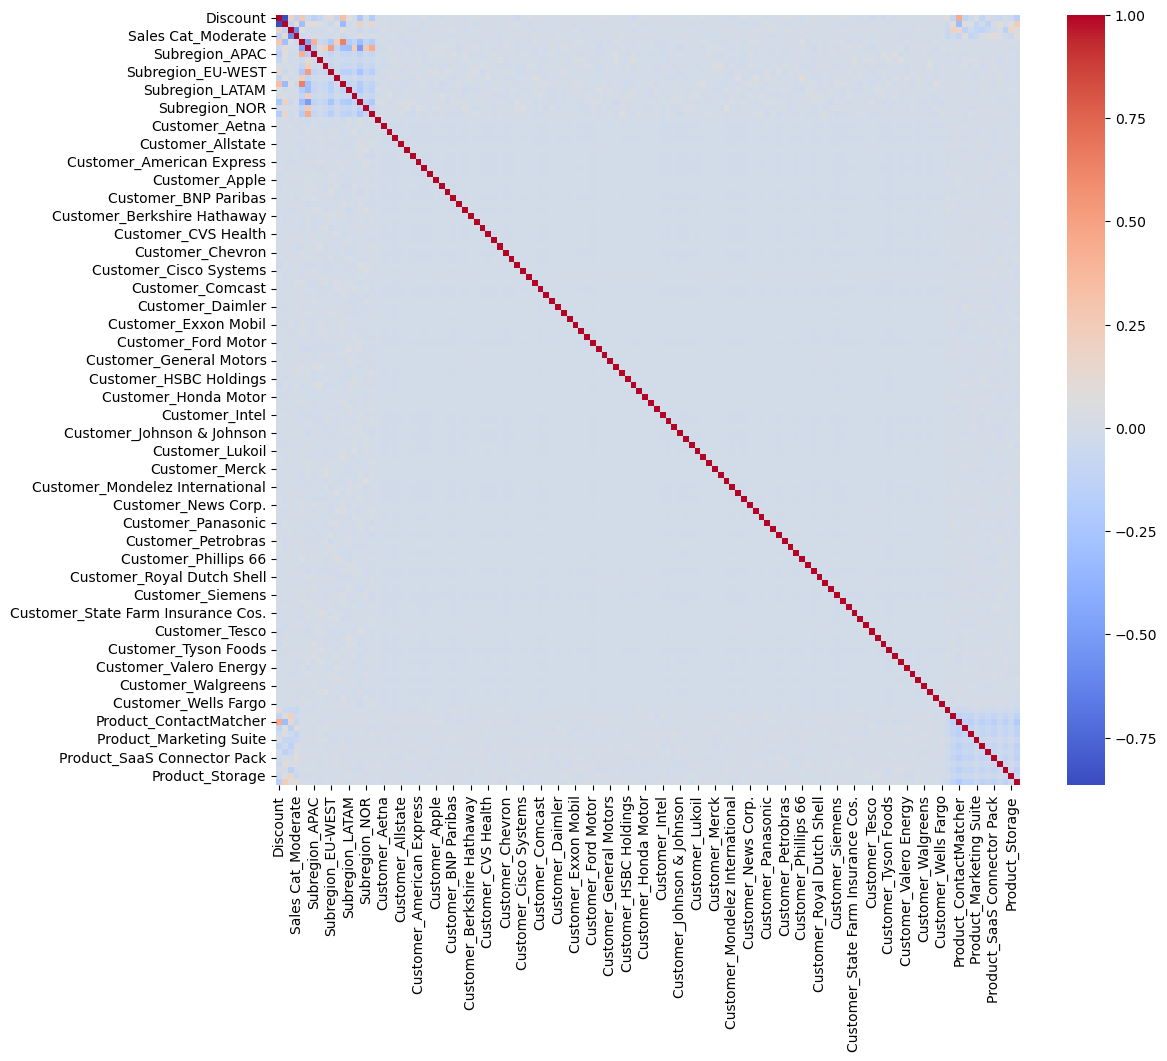

In [191]:
corr_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)

In [192]:
calc_vif_light(X.drop(columns=['Profit Margin','Region_EMEA', 'Subregion_MEA', 'Subregion_EU-EAST']))

1. Discount: VIF = 3.47
2. Sales Cat_Low: VIF = 2.72
3. Sales Cat_Moderate: VIF = 3.59
4. Region_APJ: VIF = 7.36
5. Subregion_APAC: VIF = 2.18
6. Subregion_EU: VIF = 1.19
7. Subregion_EU-WEST: VIF = 3.17
8. Subregion_IND: VIF = 1.42
9. Subregion_JAPN: VIF = 2.95
10. Subregion_LATAM: VIF = 2.57
11. Subregion_NAMER: VIF = 4.33
12. Subregion_NOR: VIF = 1.68
13. Subregion_UKIR: VIF = 2.73
14. Customer_Abbott Laboratories: VIF = 1.33
15. Customer_Aetna: VIF = 1.72
16. Customer_Airbus: VIF = 1.57
17. Customer_Allianz: VIF = 1.91
18. Customer_Allstate: VIF = 1.50
19. Customer_Alphabet: VIF = 1.20
20. Customer_Amazon: VIF = 1.63
21. Customer_American Express: VIF = 1.65
22. Customer_AmerisourceBergen: VIF = 1.69
23. Customer_Anthem: VIF = 1.64
24. Customer_Apple: VIF = 1.44
25. Customer_Aviva: VIF = 1.47
26. Customer_BMW: VIF = 1.51
27. Customer_BNP Paribas: VIF = 1.72
28. Customer_Banco Santander: VIF = 1.41
29. Customer_Bank of America Corp.: VIF = 1.65
30. Customer_Berkshire Hathaway: VIF =

In [193]:
# Redefine Feature
X = X.drop(columns = ['Profit Margin', 'Region_EMEA', 'Subregion_MEA', 'Subregion_EU-EAST'])
X.head()

Discount  Sales Cat_Low  Sales Cat_Moderate  Region_APJ  Subregion_APAC  \
0      0.00            0.0                 0.0         0.0             0.0   
1      0.00            0.0                 0.0         0.0             0.0   
2      0.00            1.0                 0.0         0.0             0.0   
3      0.45            0.0                 0.0         0.0             0.0   
4      0.20            0.0                 1.0         0.0             0.0   

   Subregion_EU  Subregion_EU-WEST  Subregion_IND  Subregion_JAPN  \
0           0.0                0.0            0.0             0.0   
1           0.0                0.0            0.0             0.0   
2           0.0                0.0            0.0             0.0   
3           0.0                1.0            0.0             0.0   
4           0.0                1.0            0.0             0.0   

   Subregion_LATAM  Subregion_NAMER  Subregion_NOR  Subregion_UKIR  \
0              0.0              0.0            0.0             1.0   
1              0.0              0.0            0.0             1.0   
2              0.0              1.0            0.0             0.0   
3              0.0              0.0            0.0             0.0   
4              0.0              0.0            0.0             0.0   

   Customer_Abbott Laboratories  Customer_Aetna  Customer_Airbus  \
0                           0.0             0.0              0.0   
1                           0.0             0.0              0.0   
2                           0.0             0.0              0.0   
3                           0.0             0.0              0.0   
4                           0.0             0.0              0.0   

   Customer_Allianz  Customer_Allstate  Customer_Alphabet  Customer_Amazon  \
0               0.0                0.0                0.0              0.0   
1               0.0                0.0                0.0              0.0   
2               0.0                0.0                0.0              0.0   
3               0.0                0.0                0.0              0.0   
4               0.0                0.0                0.0              0.0   

   Customer_American Express  Customer_AmerisourceBergen  Customer_Anthem  \
0                        0.0                         0.0              0.0   
1                        0.0                         0.0              0.0   
2                        0.0                         0.0              0.0   
3                        0.0                         0.0              0.0   
4                        0.0                         0.0              0.0   

   Customer_Apple  Customer_Aviva  Customer_BMW  Customer_BNP Paribas  \
0             0.0             0.0           0.0                   0.0   
1             0.0             0.0           0.0                   0.0   
2             0.0             0.0           0.0                   0.0   
3             0.0             0.0           0.0                   0.0   
4             0.0             0.0           0.0                   0.0   

   Customer_Banco Santander  Customer_Bank of America Corp.  \
0                       0.0                             0.0   
1                       0.0                             0.0   
2                       0.0                             0.0   
3                       0.0                             0.0   
4                       0.0                             0.0   

   Customer_Berkshire Hathaway  Customer_Boeing  Customer_Bosch  \
0                          0.0              0.0             0.0   
1                          0.0              0.0             0.0   
2                          0.0              0.0             0.0   
3                          0.0              0.0             0.0   
4                          0.0              0.0             0.0   

   Customer_CVS Health  Customer_Carrefour  Customer_Caterpillar  \
0                  0.0                 0.0                   0.0   


In [194]:
# Encoding
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)
X.head()

Discount  Sales Cat_Low  Sales Cat_Moderate  Region_APJ  Subregion_APAC  \
0      0.00            0.0                 0.0         0.0             0.0   
1      0.00            0.0                 0.0         0.0             0.0   
2      0.00            1.0                 0.0         0.0             0.0   
3      0.45            0.0                 0.0         0.0             0.0   
4      0.20            0.0                 1.0         0.0             0.0   

   Subregion_EU  Subregion_EU-WEST  Subregion_IND  Subregion_JAPN  \
0           0.0                0.0            0.0             0.0   
1           0.0                0.0            0.0             0.0   
2           0.0                0.0            0.0             0.0   
3           0.0                1.0            0.0             0.0   
4           0.0                1.0            0.0             0.0   

   Subregion_LATAM  Subregion_NAMER  Subregion_NOR  Subregion_UKIR  \
0              0.0              0.0            0.0             1.0   
1              0.0              0.0            0.0             1.0   
2              0.0              1.0            0.0             0.0   
3              0.0              0.0            0.0             0.0   
4              0.0              0.0            0.0             0.0   

   Customer_Abbott Laboratories  Customer_Aetna  Customer_Airbus  \
0                           0.0             0.0              0.0   
1                           0.0             0.0              0.0   
2                           0.0             0.0              0.0   
3                           0.0             0.0              0.0   
4                           0.0             0.0              0.0   

   Customer_Allianz  Customer_Allstate  Customer_Alphabet  Customer_Amazon  \
0               0.0                0.0                0.0              0.0   
1               0.0                0.0                0.0              0.0   
2               0.0                0.0                0.0              0.0   
3               0.0                0.0                0.0              0.0   
4               0.0                0.0                0.0              0.0   

   Customer_American Express  Customer_AmerisourceBergen  Customer_Anthem  \
0                        0.0                         0.0              0.0   
1                        0.0                         0.0              0.0   
2                        0.0                         0.0              0.0   
3                        0.0                         0.0              0.0   
4                        0.0                         0.0              0.0   

   Customer_Apple  Customer_Aviva  Customer_BMW  Customer_BNP Paribas  \
0             0.0             0.0           0.0                   0.0   
1             0.0             0.0           0.0                   0.0   
2             0.0             0.0           0.0                   0.0   
3             0.0             0.0           0.0                   0.0   
4             0.0             0.0           0.0                   0.0   

   Customer_Banco Santander  Customer_Bank of America Corp.  \
0                       0.0                             0.0   
1                       0.0                             0.0   
2                       0.0                             0.0   
3                       0.0                             0.0   
4                       0.0                             0.0   

   Customer_Berkshire Hathaway  Customer_Boeing  Customer_Bosch  \
0                          0.0              0.0             0.0   
1                          0.0              0.0             0.0   
2                          0.0              0.0             0.0   
3                          0.0              0.0             0.0   
4                          0.0              0.0             0.0   

   Customer_CVS Health  Customer_Carrefour  Customer_Caterpillar  \
0                  0.0                 0.0                   0.0   


In [195]:
X = sm.add_constant(X)
X.head()

const  Discount  Sales Cat_Low  Sales Cat_Moderate  Region_APJ  \
0    1.0      0.00            0.0                 0.0         0.0   
1    1.0      0.00            0.0                 0.0         0.0   
2    1.0      0.00            1.0                 0.0         0.0   
3    1.0      0.45            0.0                 0.0         0.0   
4    1.0      0.20            0.0                 1.0         0.0   

   Subregion_APAC  Subregion_EU  Subregion_EU-WEST  Subregion_IND  \
0             0.0           0.0                0.0            0.0   
1             0.0           0.0                0.0            0.0   
2             0.0           0.0                0.0            0.0   
3             0.0           0.0                1.0            0.0   
4             0.0           0.0                1.0            0.0   

   Subregion_JAPN  Subregion_LATAM  Subregion_NAMER  Subregion_NOR  \
0             0.0              0.0              0.0            0.0   
1             0.0              0.0              0.0            0.0   
2             0.0              0.0              1.0            0.0   
3             0.0              0.0              0.0            0.0   
4             0.0              0.0              0.0            0.0   

   Subregion_UKIR  Customer_Abbott Laboratories  Customer_Aetna  \
0             1.0                           0.0             0.0   
1             1.0                           0.0             0.0   
2             0.0                           0.0             0.0   
3             0.0                           0.0             0.0   
4             0.0                           0.0             0.0   

   Customer_Airbus  Customer_Allianz  Customer_Allstate  Customer_Alphabet  \
0              0.0               0.0                0.0                0.0   
1              0.0               0.0                0.0                0.0   
2              0.0               0.0                0.0                0.0   
3              0.0               0.0                0.0                0.0   
4              0.0               0.0                0.0                0.0   

   Customer_Amazon  Customer_American Express  Customer_AmerisourceBergen  \
0              0.0                        0.0                         0.0   
1              0.0                        0.0                         0.0   
2              0.0                        0.0                         0.0   
3              0.0                        0.0                         0.0   
4              0.0                        0.0                         0.0   

   Customer_Anthem  Customer_Apple  Customer_Aviva  Customer_BMW  \
0              0.0             0.0             0.0           0.0   
1              0.0             0.0             0.0           0.0   
2              0.0             0.0             0.0           0.0   
3              0.0             0.0             0.0           0.0   
4              0.0             0.0             0.0           0.0   

   Customer_BNP Paribas  Customer_Banco Santander  \
0                   0.0                       0.0   
1                   0.0                       0.0   
2                   0.0                       0.0   
3                   0.0                       0.0   
4                   0.0                       0.0   

   Customer_Bank of America Corp.  Customer_Berkshire Hathaway  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   

   Customer_Boeing  Customer_Bosch  Customer_CVS Health  Customer_Carrefour  \
0              0.0             0.0                  0.0                 0.0   
1              0.0             0.0                  0.0                 0.0   
2              0.0             0.0                  0.0

In [196]:
# Modelling
model1 = sm.Logit(y, X)
result1 = model1.fit(method='lbfgs', maxiter=100)

print(result1.summary())

                           Logit Regression Results                           
Dep. Variable:          Profit Binary   No. Observations:                 9994
Model:                          Logit   Df Residuals:                     9869
Method:                           MLE   Df Model:                          124
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.7410
Time:                        13:26:48   Log-Likelihood:                -1248.3
converged:                      False   LL-Null:                       -4818.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -17.8092      2.249     -7.919      0.000     -22.217     -13.401
Discount                                35.0741      

**Findings**
1. Discount
    The variable Discount is a highly significant predictor of negative profit (coef = 35.07, p = 0.000). The positive coefficient suggests that higher discounts substantially increase the odds of experiencing a negative profit. This aligns with economic intuition, where excessive discounting may erode profit margins.
2. Sales
   Compared to the reference category (Sales Cat_High), both Low and Moderate sales categories are associated with significantly lower odds of negative profit:
   - Sales Cat_Low: coef = -1.24, p = 0.000
   - Sales Cat_Moderate: coef = -0.27, p = 0.028
This implies that transactions with lower sales volume are less likely to incur negative profit.
4. Geographic
Most regional and subregional variables are not statistically significant, with the exception of Subregion_UKIR, which shows a negative and significant relationship with negative profit (coef = -0.956, p = 0.012).
5. Customer
Very few customer-specific dummy variables are statistically significant. One notable exception is Customer_McKesson, which is positively associated with negative profit (coef = 1.66, p = 0.013), potentially indicating a pricing or operational concern specific to this client.
6. Product
    - Several product categories exhibit significant associations:
    - ContactMatcher (coef = 8.41, p = 0.000)
    - Data Smasher (coef = 10.23, p = 0.000)
    - FinanceHub (coef = 9.82, p = 0.000)
    - Marketing Suite and Marketing Suite - Gold (coef = 11.56 and 11.16, respectively; p = 0.000)
    - SaaS Connector Pack (coef = 9.06, p = 0.000)
    - Support and Storage (coef = 8.53 and 9.98, respectively; p = 0.000)
These large positive coefficients suggest that these products are strongly associated with higher odds of negative profit. This may point to unsustainable pricing, bundling strategies, or high associated costs.

#### **Model 2**
To identify a better-fitting model, **Subregion and Customer variables were excluded** in Model 2, as the majority of these predictors were not statistically significant in Model 1.

In [197]:
# Define Features Model 2
X_2 = df_clean[['Sales Cat', 'Discount', 'Region', 'Product']]
X_2.head()

Sales Cat  Discount Region                 Product
0      High      0.00   EMEA         Marketing Suite
1      High      0.00   EMEA              FinanceHub
2       Low      0.00   AMER              FinanceHub
3      High      0.45   EMEA          ContactMatcher
4  Moderate      0.20   EMEA  Marketing Suite - Gold

In [198]:
# Encoding
X_2 = pd.get_dummies(X_2, drop_first=True)
X_2 = X_2.astype(float)
X_2.head()

Discount  Sales Cat_Low  Sales Cat_Moderate  Region_APJ  Region_EMEA  \
0      0.00            0.0                 0.0         0.0          1.0   
1      0.00            0.0                 0.0         0.0          1.0   
2      0.00            1.0                 0.0         0.0          0.0   
3      0.45            0.0                 0.0         0.0          1.0   
4      0.20            0.0                 1.0         0.0          1.0   

   Product_Big Ol Database  Product_ChatBot Plugin  Product_ContactMatcher  \
0                      0.0                     0.0                     0.0   
1                      0.0                     0.0                     0.0   
2                      0.0                     0.0                     0.0   
3                      0.0                     0.0                     1.0   
4                      0.0                     0.0                     0.0   

   Product_Data Smasher  Product_FinanceHub  Product_Marketing Suite  \
0                   0.0                 0.0                      1.0   
1                   0.0                 1.0                      0.0   
2                   0.0                 1.0                      0.0   
3                   0.0                 0.0                      0.0   
4                   0.0                 0.0                      0.0   

   Product_Marketing Suite - Gold  Product_OneView  \
0                             0.0              0.0   
1                             0.0              0.0   
2                             0.0              0.0   
3                             0.0              0.0   
4                             1.0              0.0   

   Product_SaaS Connector Pack  Product_SaaS Connector Pack - Gold  \
0                          0.0                                 0.0   
1                          0.0                                 0.0   
2                          0.0                                 0.0   
3                          0.0                                 0.0   
4                          0.0                                 0.0   

   Product_Site Analytics  Product_Storage  Product_Support  
0                     0.0              0.0              0.0  
1                     0.0              0.0              0.0  
2                     0.0              0.0              0.0  
3                     0.0              0.0              0.0  
4                     0.0              0.0              0.0

In [199]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)     
pd.set_option('display.width', 0)

X.corr(method='spearman')

const  Discount  Sales Cat_Low  \
const                                   NaN       NaN            NaN   
Discount                                NaN  1.000000       0.113089   
Sales Cat_Low                           NaN  0.113089       1.000000   
Sales Cat_Moderate                      NaN -0.129655      -0.577389   
Region_APJ                              NaN  0.259963       0.063197   
Subregion_APAC                          NaN -0.192654      -0.025409   
Subregion_EU                            NaN -0.103639      -0.023245   
Subregion_EU-WEST                       NaN  0.150675       0.023600   
Subregion_IND                           NaN -0.120859      -0.025252   
Subregion_JAPN                          NaN  0.358881       0.077375   
Subregion_LATAM                         NaN  0.075738       0.006179   
Subregion_NAMER                         NaN -0.232199      -0.051509   
Subregion_NOR                           NaN -0.005559      -0.003455   
Subregion_UKIR                          NaN -0.223878      -0.037288   
Customer_Abbott Laboratories            NaN -0.014320      -0.016274   
Customer_Aetna                          NaN  0.006019       0.020248   
Customer_Airbus                         NaN -0.035535       0.008921   
Customer_Allianz                        NaN -0.002616       0.001700   
Customer_Allstate                       NaN -0.025474       0.003978   
Customer_Alphabet                       NaN  0.004595       0.000008   
Customer_Amazon                         NaN -0.000652      -0.013047   
Customer_American Express               NaN -0.007711      -0.014395   
Customer_AmerisourceBergen              NaN  0.038914      -0.011904   
Customer_Anthem                         NaN -0.022437      -0.000991   
Customer_Apple                          NaN  0.015050       0.000011   
Customer_Aviva                          NaN -0.028105       0.013943   
Customer_BMW                            NaN  0.001235      -0.006052   
Customer_BNP Paribas                    NaN  0.019859       0.018657   
Customer_Banco Santander                NaN  0.020735       0.002542   
Customer_Bank of America Corp.          NaN -0.017754      -0.014156   
Customer_Berkshire Hathaway             NaN  0.000029       0.008347   
Customer_Boeing                         NaN  0.021297       0.003680   
Customer_Bosch                          NaN  0.002984      -0.007977   
Customer_CVS Health                     NaN -0.009306       0.006617   
Customer_Carrefour                      NaN -0.002538       0.002134   
Customer_Caterpillar                    NaN -0.000765      -0.006244   
Customer_Chevron                        NaN  0.010485       0.004277   
Customer_China National Petroleum       NaN  0.005874       0.007501   
Customer_Cigna                          NaN -0.031885      -0.007970   
Customer_Cisco Systems                  NaN -0.002598      -0.009466   
Customer_Citigroup                      NaN  0.009230       0.002471   
Customer_Coca-Cola                      NaN  0.004287      -0.013521   
Customer_Comcast                        NaN  0.019271       0.006898   
Customer_ConocoPhillips                 NaN  0.008082      -0.006820   
Customer_Costco Wholesale               NaN -0.007062      -0.001462   
Customer_Daimler                        NaN  0.005936      -0.005974   
Customer_Enel                           NaN  0.004555      -0.002583   
Customer_Engie                          NaN  0.000455       0.003529   
Customer_Exxon Mobil                    NaN  0.012628       0.020950   
Customer_Fannie Mae                     NaN  0.002801      -0.014933   
Customer_FedEx                          NaN -0.009635       0.007595   
Customer_Ford Motor                     NaN -0.010443      -0.010526   
Customer_Gazprom                        NaN  0.017363       0.005577   
Customer_General Electric               NaN  0.020241       0.000008   
Customer_General Motors                 NaN -0.019152      -0.007349   
Custom

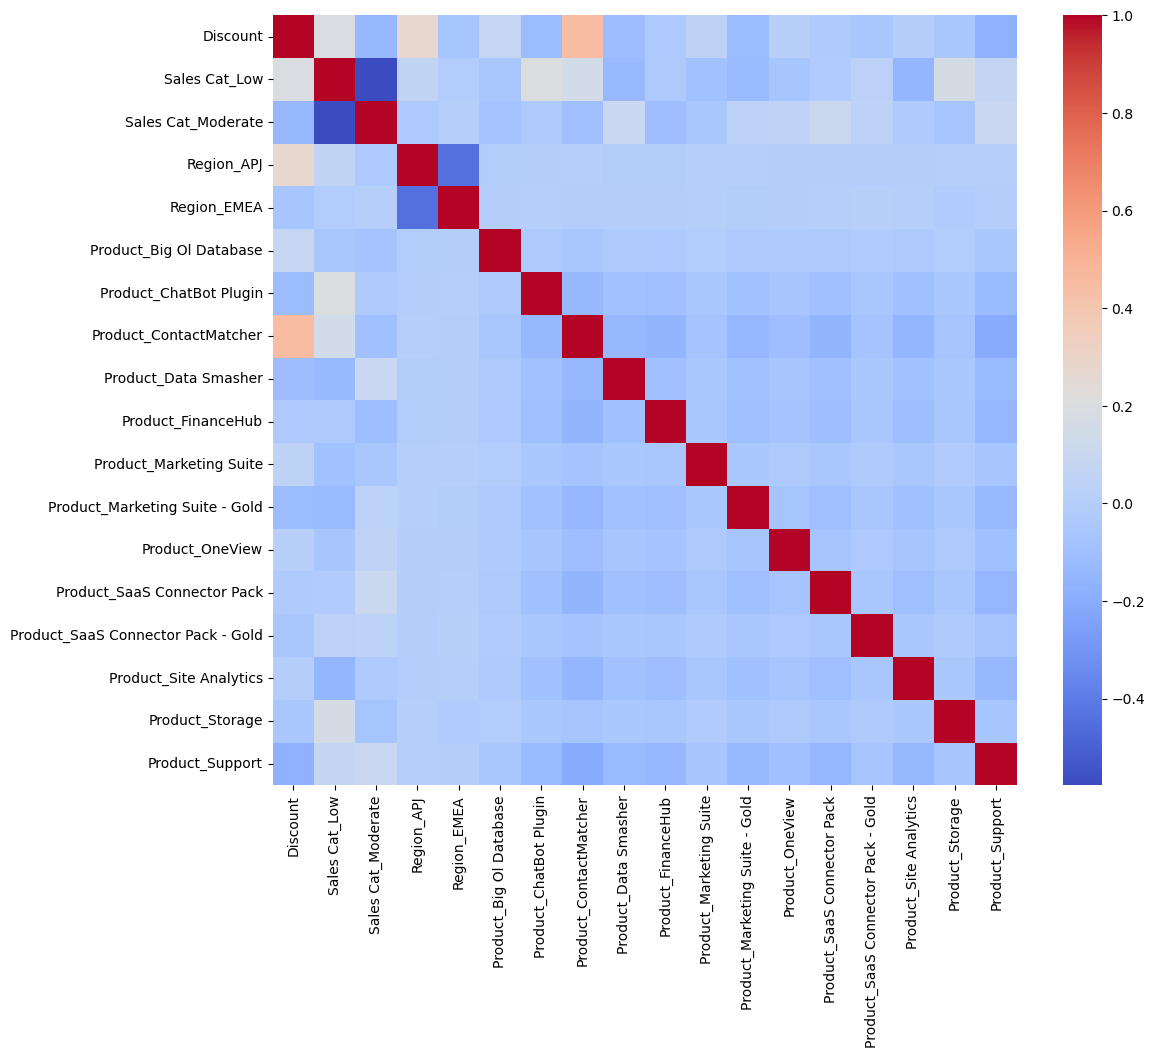

In [200]:
corr_matrix = X_2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

In [201]:
# Multicollinearity 
# VIF > 10

calc_vif_light(X_2)

1. Discount: VIF = 2.41
2. Sales Cat_Low: VIF = 2.69
3. Sales Cat_Moderate: VIF = 3.55
4. Region_APJ: VIF = 1.75
5. Region_EMEA: VIF = 2.15
6. Product_Big Ol Database: VIF = 1.05
7. Product_ChatBot Plugin: VIF = 1.69
8. Product_ContactMatcher: VIF = 2.57
9. Product_Data Smasher: VIF = 1.41
10. Product_FinanceHub: VIF = 1.37
11. Product_Marketing Suite: VIF = 1.08
12. Product_Marketing Suite - Gold: VIF = 1.37
13. Product_OneView: VIF = 1.26
14. Product_SaaS Connector Pack: VIF = 1.67
15. Product_SaaS Connector Pack - Gold: VIF = 1.20
16. Product_Site Analytics: VIF = 1.34
17. Product_Storage: VIF = 1.21
18. Product_Support: VIF = 2.18


In [202]:
calc_vif_light(X_2.drop(columns=['Sales Cat_Moderate']))

1. Discount: VIF = 2.40
2. Sales Cat_Low: VIF = 1.64
3. Region_APJ: VIF = 1.75
4. Region_EMEA: VIF = 2.15
5. Product_Big Ol Database: VIF = 1.05
6. Product_ChatBot Plugin: VIF = 1.27
7. Product_ContactMatcher: VIF = 1.98
8. Product_Data Smasher: VIF = 1.13
9. Product_FinanceHub: VIF = 1.20
10. Product_Marketing Suite: VIF = 1.06
11. Product_Marketing Suite - Gold: VIF = 1.15
12. Product_OneView: VIF = 1.10
13. Product_SaaS Connector Pack: VIF = 1.21
14. Product_SaaS Connector Pack - Gold: VIF = 1.06
15. Product_Site Analytics: VIF = 1.19
16. Product_Storage: VIF = 1.10
17. Product_Support: VIF = 1.36


In [203]:
# Redefine Features Model 2
X_2 = X_2.drop(columns=['Sales Cat_Moderate'])

In [204]:
X_2 = sm.add_constant(X_2)
X_2.head()

const  Discount  Sales Cat_Low  Region_APJ  Region_EMEA  \
0    1.0      0.00            0.0         0.0          1.0   
1    1.0      0.00            0.0         0.0          1.0   
2    1.0      0.00            1.0         0.0          0.0   
3    1.0      0.45            0.0         0.0          1.0   
4    1.0      0.20            0.0         0.0          1.0   

   Product_Big Ol Database  Product_ChatBot Plugin  Product_ContactMatcher  \
0                      0.0                     0.0                     0.0   
1                      0.0                     0.0                     0.0   
2                      0.0                     0.0                     0.0   
3                      0.0                     0.0                     1.0   
4                      0.0                     0.0                     0.0   

   Product_Data Smasher  Product_FinanceHub  Product_Marketing Suite  \
0                   0.0                 0.0                      1.0   
1                   0.0                 1.0                      0.0   
2                   0.0                 1.0                      0.0   
3                   0.0                 0.0                      0.0   
4                   0.0                 0.0                      0.0   

   Product_Marketing Suite - Gold  Product_OneView  \
0                             0.0              0.0   
1                             0.0              0.0   
2                             0.0              0.0   
3                             0.0              0.0   
4                             1.0              0.0   

   Product_SaaS Connector Pack  Product_SaaS Connector Pack - Gold  \
0                          0.0                                 0.0   
1                          0.0                                 0.0   
2                          0.0                                 0.0   
3                          0.0                                 0.0   
4                          0.0                                 0.0   

   Product_Site Analytics  Product_Storage  Product_Support  
0                     0.0              0.0              0.0  
1                     0.0              0.0              0.0  
2                     0.0              0.0              0.0  
3                     0.0              0.0              0.0  
4                     0.0              0.0              0.0

In [205]:
model2 = sm.Logit(y, X_2)
result2 = model2.fit(method='lbfgs', maxiter=100)

print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:          Profit Binary   No. Observations:                 9994
Model:                          Logit   Df Residuals:                     9976
Method:                           MLE   Df Model:                           17
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.7277
Time:                        13:29:13   Log-Likelihood:                -1312.3
converged:                       True   LL-Null:                       -4818.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -20.0100     10.983     -1.822      0.068     -41.537       1.517
Discount                              32.8882      1.573   

#### **Odds Ratio (OR)**

In [206]:
# Discount
Beta = 32.6660
c = 0.7              
d = 0.45               

OR_discount = np.exp(Beta * (c-d))
OR_discount

# Transactions with a 70% discount have 3,521 times higher odds of resulting in negative profit compared to transactions with a 45% discount.

np.float64(3520.9988762552302)

In [207]:
# Low Sales -> Ref = High Sales
Beta = -0.8153
c = 1              
d = 0               

OR_sales = np.exp(Beta * (c-d)) # Odd Ratio
1/OR_sales

# Transactions with high sales had 2.26 times higher odds of resulting in negative profit compared to those with low sales.

np.float64(2.259853526724479)

In [208]:
# Region EMEA -> Ref = Region AMER
Beta = -0.2556      
c = 1              
d = 0               

OR_sales = np.exp(Beta * (c-d)) # Odd Ratio
1/OR_sales

# AMER region had 1.29 times higher odds of experiencing negative profit compared to those from the EMEA region.

np.float64(1.291236130174969)

#### **Findings**
**1. Discount**\
  **The Discount (coef = 32.89, p < 0.001) is the strongest and most statistically significant predictor of negative profit**. The large positive coefficient suggests that as the discount increases, the odds of experiencing negative profit increase sharply. For instance, transactions with a 70% discount have 3,521 times higher odds of resulting in negative profit compared to those with a 45% discount. This **strongly supports the hypothesis that excessive discounting substantially erodes profit margins**.

**2. Sales**\
    Transactions categorized as **Low Sales (coef = -1.02, p < 0.001) are significantly less likely to result in negative profit compared to the reference category (High Sales)**. The odds of negative profit are approximately 56% lower for low-sales transactions (OR = 0.36), or conversely, high-sales transactions are 2.77 times more likely to result in negative profit. This may suggest that smaller-scale transactions are more controlled or are subject to less aggressive discounting practices.
    
**3. Region**\
    **The EMEA region (coef = -0.26, p = 0.037) is associated with significantly lower odds of negative profit compared to the reference region (AMER)**. Specifically, the odds of experiencing negative profit are about 22.5% lower in EMEA (OR = 0.77), or equivalently, AMER has 1.29 times higher odds of negative profit. 
    
**4. Products**\
    **All product variables in this model are statistically insignificant (p > 0.05)**, including high-coefficient products such as Marketing Suite, ContactMatcher, and FinanceHub. This suggests that, after removing customer and subregion variables, the product-level differences in negative profit may be explained by other factors (e.g., discounting or sales volume) rather than product type alone.

#### **Goal 3**
Identify key factors contributing to negative profit in AWS SaaS transactions, including sales, discount, quantity, price, profit margin, products, spatial factors (region, subregion, country), and customer type (customer and segment).

#### **Answer**
The key factor contributing to negative profit in AWS SaaS transactions is discount. Based on multivariate logistic regression analysis, **discount shows the strongest and most statistically significant** association with negative profit (p < 0.001). A higher discount dramatically increases the likelihood of a transaction resulting in negative profit. For example, a transaction with a 70% discount has 3,521 times higher odds of resulting in negative profit compared to one with a 45% discount.

Other contributing factors include:

- **Sales volume**: Transactions categorized as Low Sales are significantly less likely to result in negative profit compared to High Sales transactions. High-sales transactions are associated with a 2.77 times greater risk of negative profit.

- **Region**: Transactions from the EMEA region show significantly lower odds of negative profit compared to the AMER region, suggesting regional differences in pricing or cost efficiency.

Variables such as quantity, price, profit margin, product type, subregion, country, customer, and segment may show variation descriptively but were not found to be statistically significant predictors in the multivariate model.

---

## **Goal 4**
Evaluate and optimize AWS’s pricing and discounting strategies across customer segments and product lines, with the aim of enhancing overall profitability beyond a volume-driven sales model.

Based on the results of multiple logistic regression, **higher sales do not consistently lead to positive profit**. On the contrary, transactions classified as High Sales are 2.77 times more likely to result in negative profit compared to Low Sales transactions (p < 0.001). This finding suggests that increased sales volume alone does not guarantee profitability, particularly when accompanied by excessive discounting. Thus, under certain conditions—especially with aggressive price reductions—high sales can lead to financial loss rather than gain.

This finding raises important questions about pricing strategy and customer behavior. Particularly whether products sold at lower prices (due to discounts) are more frequently purchased, and whether specific customer segments tend to drive such transactions. The following analysis seeks to investigate these patterns in greater detail.

#### **Profit vs Sales by Products**

In [31]:
product_stats = df.groupby('Product').agg(
    Total_Profit=('Profit', 'sum'),
    Total_Sales=('Sales', 'sum'),
    Avg_Profit_Margin=('Profit Margin', 'median'),
    Transaction_Count=('Product', 'count')
).reset_index()
product_stats = product_stats.sort_values(by='Total_Profit', ascending=False).reset_index(drop=True)

product_stats

Product  Total_Profit  Total_Sales  Avg_Profit_Margin  \
0                      Alchemy    55617.8249  149528.0300              33.75   
1               Site Analytics    44515.7306  330007.0540              11.25   
2                 Data Smasher    41936.6357  167380.3180              21.25   
3                      Support    32864.4698  125152.7440              45.00   
4                   FinanceHub    32136.4203  340935.4150              17.78   
5       Marketing Suite - Gold    21278.8264  223843.6080               8.75   
6                      OneView    18138.0054  107532.1610              26.00   
7          SaaS Connector Pack    13059.1436   91705.1640              27.50   
8               ContactMatcher    12496.2822  410378.2650              25.00   
9   SaaS Connector Pack - Gold     6964.1767   16476.4020              46.00   
10              ChatBot Plugin     6527.7870   27118.7920              27.00   
11             Big Ol Database     3384.7569  189238.6310              11.25   
12                     Storage      949.5182    3024.2800              33.75   
13             Marketing Suite    -3472.5560  114879.9963               1.18   

    Transaction_Count  
0                  68  
1                 889  
2                 775  
3                1560  
4                 981  
5                 846  
6                 466  
7                 957  
8                1842  
9                 254  
10                796  
11                115  
12                217  
13                228

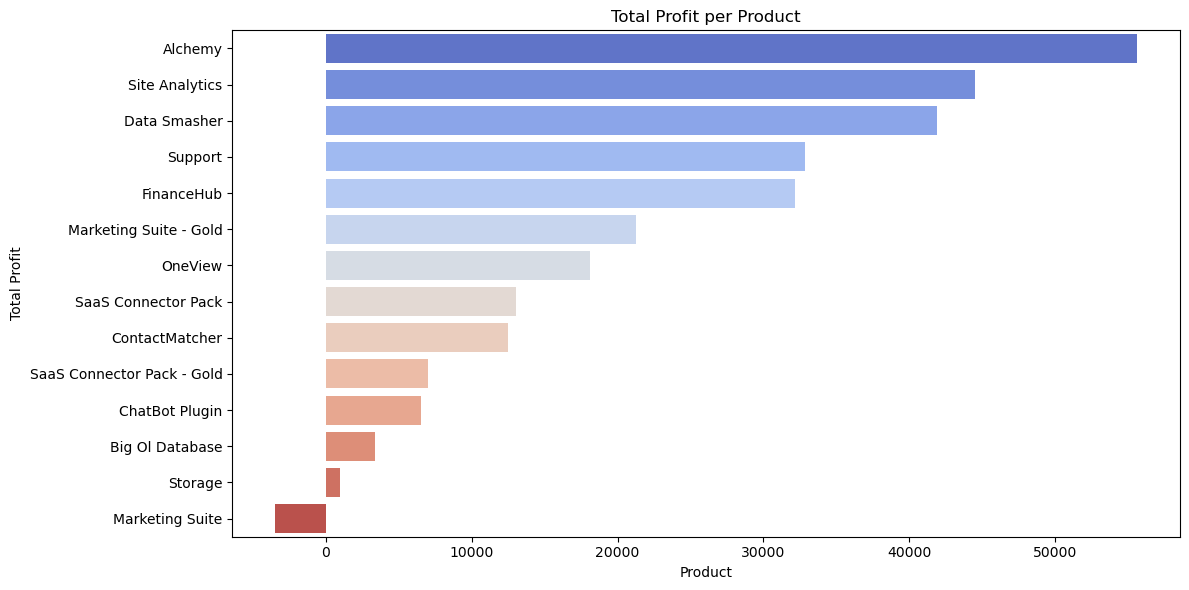

In [32]:
# Visualization of Total Profit per Procuct
plt.figure(figsize=(12, 6))
sns.barplot(data=product_stats, x='Total_Profit', y='Product', palette=sns.color_palette("coolwarm", n_colors=len(product_stats)))
plt.title('Total Profit per Product')
plt.ylabel('Total Profit')
plt.xlabel('Product')
plt.tight_layout()

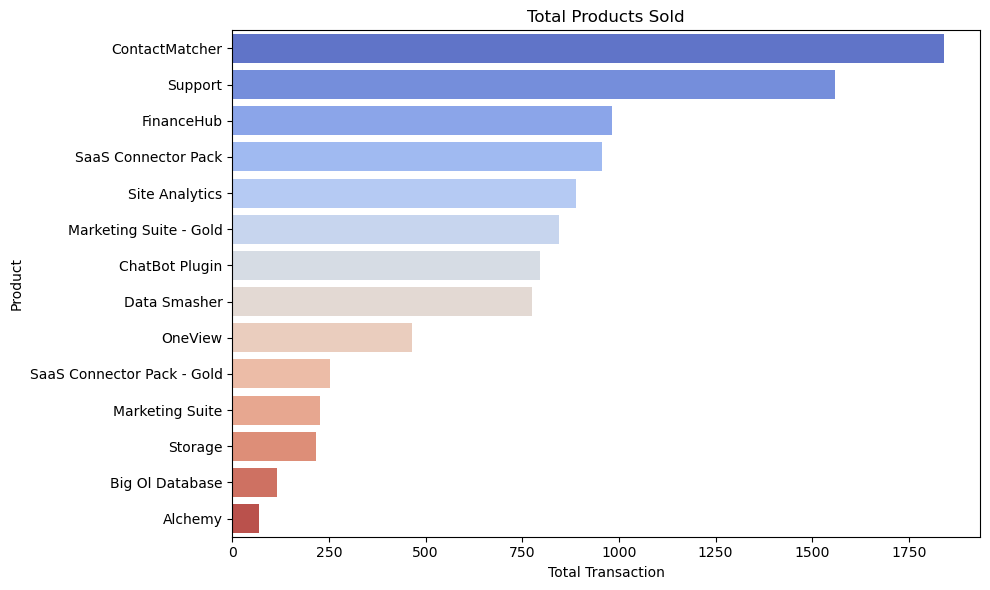

In [33]:
# Visualization of Total Product Sold
product_sold = product_stats.sort_values(by='Transaction_Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=product_sold, x='Transaction_Count', y='Product', palette=sns.color_palette("coolwarm", n_colors=len(product_stats)))
plt.title('Total Products Sold')
plt.xlabel('Total Transaction')
plt.ylabel('Product')
plt.tight_layout()

**Conclusion**\
Product with the highest total profit is Alchemy, followed by Site Analytics, and Data Smasher. Meanwhile, the top-selling products are ContactMatcher, Support, and FinanceHub. Notably, there is **no overlap between the top three products by profit and those by sales volume**. This indicates that high sales do not necessarily translate into high profit.

This observation raises a key question:\
***"Why do products with high sales not yield high profit?"***

#### **Sales vs Discount by Product**

In [34]:
discount_by_product = df.groupby(['Product', 'Discount']).size().reset_index(name='Transaction_Count')
pivot_df = discount_by_product.pivot(index='Product', columns='Discount', values='Transaction_Count').fillna(0)
pivot_df

Discount                     0.00  0.10  0.15   0.20   0.30  0.32   0.40  \
Product                                                                    
Alchemy                      22.0   0.0   0.0   37.0    0.0   0.0    9.0   
Big Ol Database              29.0   2.0   0.0   31.0    5.0   0.0   13.0   
ChatBot Plugin              498.0   0.0   0.0  298.0    0.0   0.0    0.0   
ContactMatcher              409.0   0.0   0.0  644.0   54.0   0.0   75.0   
Data Smasher                471.0   0.0   0.0  304.0    0.0   0.0    0.0   
FinanceHub                  372.0  76.0   0.0  375.0  158.0   0.0    0.0   
Marketing Suite              60.0   0.0  52.0   46.0   10.0  27.0    0.0   
Marketing Suite - Gold      530.0   0.0   0.0  316.0    0.0   0.0    0.0   
OneView                     271.0  16.0   0.0  112.0    0.0   0.0    0.0   
SaaS Connector Pack         571.0   0.0   0.0  248.0    0.0   0.0    0.0   
SaaS Connector Pack - Gold  152.0   0.0   0.0  102.0    0.0   0.0    0.0   
Site Analytics              311.0   0.0   0.0  469.0    0.0   0.0  109.0   
Storage                     128.0   0.0   0.0   89.0    0.0   0.0    0.0   
Support                     974.0   0.0   0.0  586.0    0.0   0.0    0.0   

Discount                    0.45  0.50   0.60   0.70   0.80  
Product                                                      
Alchemy                      0.0   0.0    0.0    0.0    0.0  
Big Ol Database              0.0  12.0    0.0   23.0    0.0  
ChatBot Plugin               0.0   0.0    0.0    0.0    0.0  
ContactMatcher              11.0  36.0    0.0  380.0  233.0  
Data Smasher                 0.0   0.0    0.0    0.0    0.0  
FinanceHub                   0.0   0.0    0.0    0.0    0.0  
Marketing Suite              0.0  18.0    0.0   15.0    0.0  
Marketing Suite - Gold       0.0   0.0    0.0    0.0    0.0  
OneView                      0.0   0.0    0.0    0.0   67.0  
SaaS Connector Pack          0.0   0.0  138.0    0.0    0.0  
SaaS Connector Pack - Gold   0.0   0.0    0.0    0.0    0.0  
Site Analytics               0.0   0.0    0.0    0.0    0.0  
Storage                      0.0   0.0    0.0    0.0    0.0  
Support                      0.0   0.0    0.0    0.0    0.0

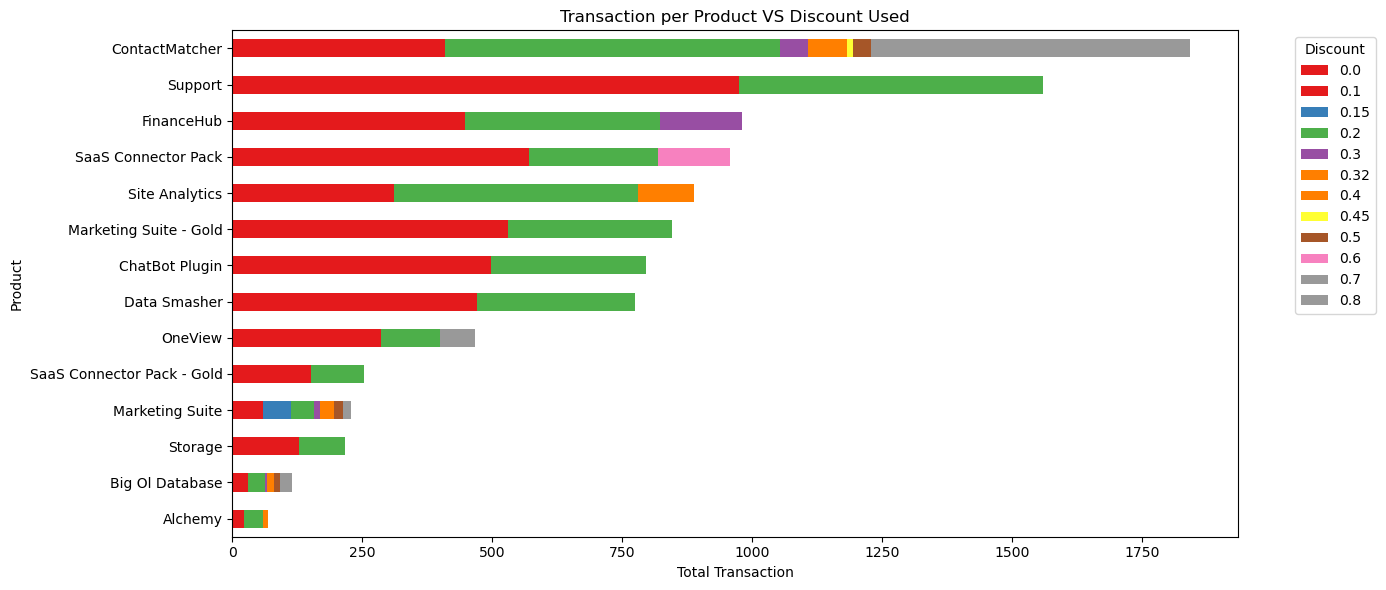

In [35]:
# Visualization of Sales vs Discount Product
pivot_df['Total_Transaction'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values(by='Total_Transaction', ascending=True)
pivot_df.drop(columns='Total_Transaction', inplace=True)

pivot_df.plot(kind='barh', stacked=True, figsize=(14, 6), colormap='Set1')
plt.title('Transaction per Product VS Discount Used')
plt.xlabel('Total Transaction')
plt.ylabel('Product')
plt.legend(title='Discount', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

**Insight**\
Based on the output above, the product with the highest number of sales is ContactMatcher. All products have been purchased at least once without any discount, indicating that purchasing decisions are not solely driven by discount strategies. Interestingly, only 7 out of 14 products have ever offered discounts of 30% or more.

Notably, ContactMatcher is the product that most frequently offers discounts, and it also has the highest number of transactions within the largest discount tier (80%). This may suggest the implementation of an aggressive pricing strategy, which could have implications for profit margins and overall sales performance.

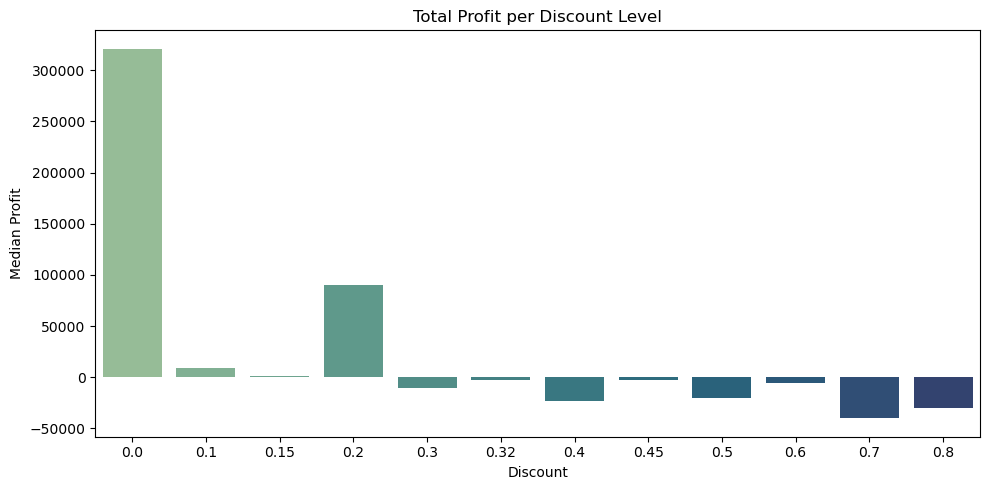

In [36]:
# Total Profit per Discount Level
profit_per_discount = df.groupby('Discount')['Profit'].sum().reset_index()
profit_per_discount.columns = ['Discount', 'Total_Profit']
plt.figure(figsize=(10, 5))
sns.barplot(data=profit_per_discount, x='Discount', y='Total_Profit', palette='crest')
plt.title('Total Profit per Discount Level')
plt.xlabel('Discount')
plt.ylabel('Median Profit')
plt.tight_layout()

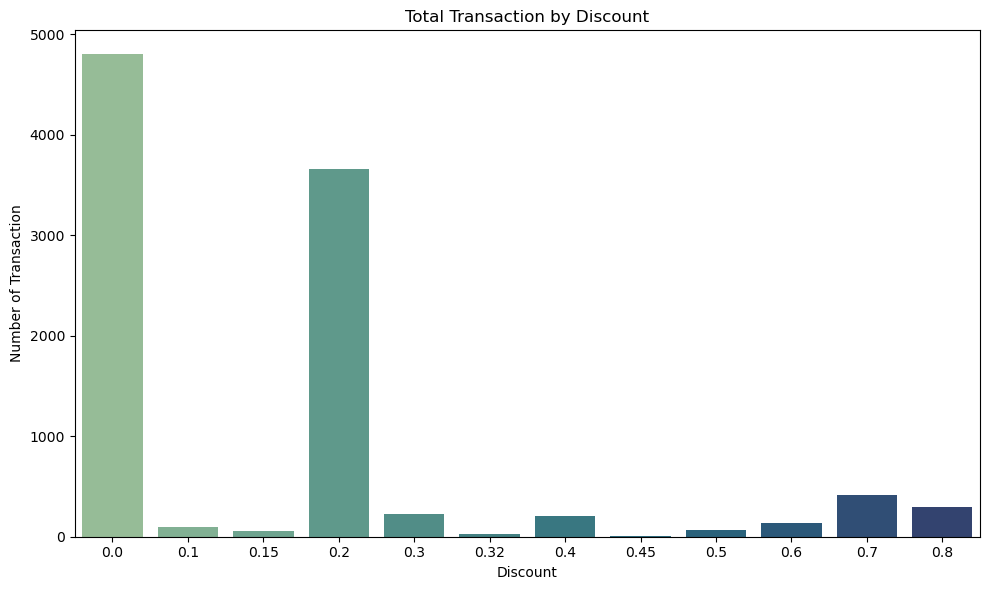

In [37]:
# Total Transaction by Discount Level
df['Discount'].value_counts().sort_index()
transaction_by_disc = df['Discount'].value_counts().reset_index()
transaction_by_disc.columns = ['Discount', 'Transaction_Count']
transaction_by_disc = transaction_by_disc.sort_values(by='Discount').reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=transaction_by_disc, y='Transaction_Count', x='Discount', palette='crest')

plt.title('Total Transaction by Discount')
plt.xlabel('Discount')
plt.ylabel('Number of Transaction')
plt.tight_layout()

**Conclusion**\
Based on the visualization of total transactions by discount and the corresponding profit earned by AWS, it can be concluded that customers still purchase AWS products even in the absence of any discounts. Negative profit margins begin to emerge when discounts reach 30%, and the profit continues to decline as the discount increases. However, despite the higher discounts, sales volume does not necessarily increase—products with 0% or 20% discounts still outperform those with larger discounts in terms of transaction volume.

This finding raises a critical question:\
***Why do higher discounts not lead to increased sales performance or improved profitability?*** 

In [38]:
# Average (Median) Unit Price by Discount
price_by_disc = df.groupby('Discount')['Price Per Unit'].median().reset_index()
price_by_disc.columns = ['Discount', 'Avg Unit Price']
price_by_disc = price_by_disc.sort_values(by='Discount').reset_index(drop=True)
price_by_disc

Discount  Avg Unit Price
0       0.00          15.985
1       0.10         113.980
2       0.15         130.980
3       0.20          19.990
4       0.30         147.830
5       0.32         180.980
6       0.40         179.990
7       0.45         218.750
8       0.50         181.765
9       0.60          18.940
10      0.70          11.730
11      0.80          11.500

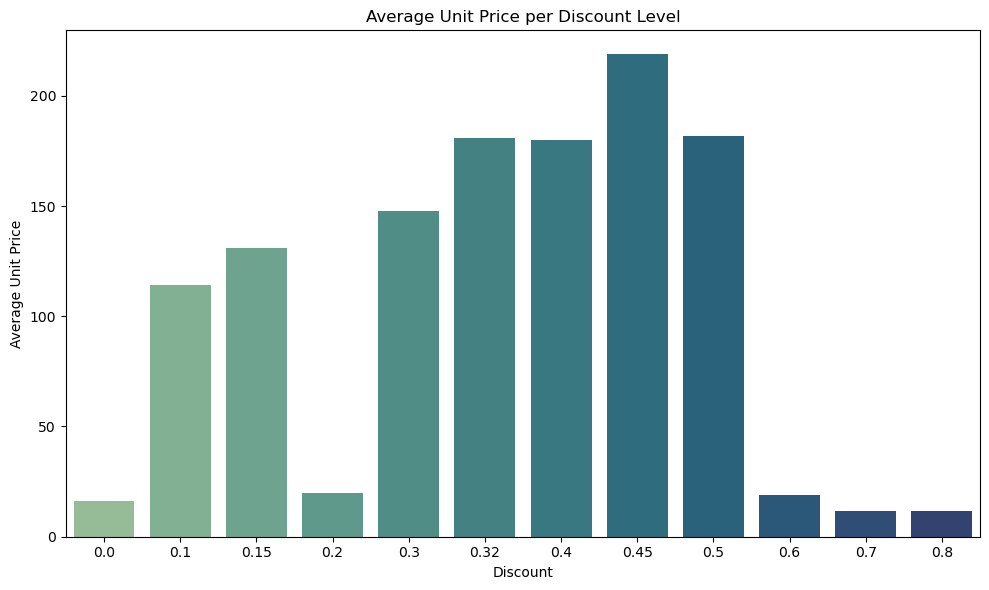

In [39]:
# Visualization of Average (Median) Unit Price by Discount
plt.figure(figsize=(10, 6))
sns.barplot(data=price_by_disc, x='Discount', y='Avg Unit Price', palette='crest')

plt.title('Average Unit Price per Discount Level')
plt.xlabel('Discount')
plt.ylabel('Average Unit Price')
plt.tight_layout()

**Insight**\
An examination of average unit price across discount levels reveals a distinct pricing and discounting strategy. Products sold without discounts (0%) have an average unit price of 15.99, indicating that some **low-priced products continue to attract demand without promotional incentives**. However, at 10%–50% discounts, there is a substantial increase in average unit price, peaking at 218.75 at the 45% discount level. This implies that **higher-priced products are more likely to be accompanied by moderate-to-significant discount offers**, possibly to incentivize purchases or compete in saturated markets. Conversely, at **very high discount levels (≥60%)**, the average unit price drops sharply to 18.94, 11.73, and 11.50, respectively.

This finding raises a critical question:\
***Why deep discounting is primarily applied to lower-value products?***
Could it be because AWS’s customer base is predominantly composed of small and medium-sized businesses (SMB)?

SMBs often operate under tighter budget constraints and may be more price-sensitive compared to large enterprises. As a result, AWS might be offering substantial discounts on lower-value products to appeal to this segment, encourage trial, or boost short-term sales volume. However, if these products are consistently unprofitable despite high sales, this pricing strategy may need reevaluation—especially if it undermines long-term profitability.

In [40]:
# Filter discount of 50% dan 80%
df_50 = df[df['Discount'] == 0.5]
df_80 = df[df['Discount'] == 0.8]

# Calculate Total Sales dan Total Profit
total_50_sales = df_50['Sales'].sum()
total_50_profit = df_50['Profit'].sum()

total_80_sales = df_80['Sales'].sum()
total_80_profit = df_80['Profit'].sum()

# Summary
print(f"50% Discount → Total Sales: ${total_50_sales:,.2f}, Total Profit: ${total_50_profit:,.2f}")
print(f"80% Discount → Total Sales: ${total_80_sales:,.2f}, Total Profit: ${total_80_profit:,.2f}")
print(f"Total Transaction of 50% Discount: {len(df_50)}")
print(f"Total Transaction of 80% Discount: {len(df_80)}")

50% Discount → Total Sales: $58,918.54, Total Profit: $-20,506.43
80% Discount → Total Sales: $16,963.76, Total Profit: $-30,539.04
Total Transaction of 50% Discount: 66
Total Transaction of 80% Discount: 300


**Additional Analysis**\
This financial pattern corroborates the earlier observation: deep discounting (≥50%) is primarily applied to low-value products and is economically detrimental despite generating transaction volume. At the 80% discount level, for instance, 300 transactions resulted in total sales of only 16,963.76 USD but incurred a substantial loss of 30,539.04 USD. Similarly, at a 50% discount, 66 transactions still led to a loss exceeding 20,000 USD. Therefore, this evidence strengthens the argument that **excessive discounting is financially unsustainable and counterproductive.**

#### **Segment Analysis**

In [41]:
segment_summary = df_clean.groupby('Segment').agg({
    'Sales': ['count', 'sum', 'median'],
    'Discount': 'median',
    'Profit': ['sum', 'median']
})
segment_summary.columns = ['_'.join(col) for col in segment_summary.columns]
segment_summary = segment_summary.reset_index()

segment_profit_ct = pd.crosstab(df_clean['Segment'], df_clean['Profit 2 Cat'], normalize='index') * 100
segment_profit_ct = segment_profit_ct[['Negative', 'Positive']]
segment_profit_ct.columns = ['% Negative Profit', '% Positive Profit']

segment_analysis = pd.merge(segment_summary, segment_profit_ct, left_on='Segment', right_index=True)
segment_analysis.sort_values('% Negative Profit', ascending=False, inplace=True)
segment_analysis

Segment  Sales_count     Sales_sum  Sales_median  Discount_median  \
1         SMB         5191  1.161401e+06         53.72              0.2   
2   Strategic         3020  7.061464e+05         56.54              0.2   
0  Enterprise         1783  4.296531e+05         52.44              0.0   

    Profit_sum  Profit_median  % Negative Profit  % Positive Profit  
1  134119.2092         8.3754          19.321903          80.678097  
2   91979.1340         8.6940          18.410596          81.589404  
0   60298.6785         9.1020          17.498598          82.501402

**Conclusion**
1. SMB dominates transaction volume, accounting for over 50% of all sales transactions (5,191 out of 9,994). SMB segment is high in volume but lower in profitability, with the lowest median profit (8.38 USD) and highest negative profit rate (19.32%).

2. Enterprise clients, while only 18% of total transactions, yield the highest median profit (9.10 USD) and the lowest negative profit rate (17.50%), all without any discounting (median discount = 0%).

3. Strategic customers sit between SMB and Enterprise in terms of volume and profitability, but share the same median discount level as SMB (0.20). This suggests discounting may not directly improve profitability.

These patterns suggest that **discounting does not necessarily lead to better profit outcomes** and may, in fact, erode margins, particularly for lower-tier customer segments. **The strong performance of Enterprise clients without discounting highlights the potential of value-based pricing strategies, where customers are willing to pay more for perceived value**. 

This insight opens up important strategic considerations for AWS:\
***Whether the current discounting approach for SMB and Strategic customers is sustainable?***
***Whether it might be more effective to realign pricing models based on segment-specific profitability rather than volume alone.*** Prioritizing value-based pricing and optimizing discount policies tailored to each segment’s actual performance may lead to a more profitable and sustainable sales strategy overall.

#### **Bivariate Analysis**
To support the proposed hypothesis, bivariate hypothesis testing was conducted with the following variables:
- Dependent Variable: Discount
- Independent Variables: Segment (Categoric) and Price Per Unit (Numeric)

In [210]:
# Discount vs Segment
from scipy.stats import kruskal

disc_by_segment = [df_clean[df_clean['Segment'] == cat]['Discount'] for cat in df_clean['Segment'].unique()]
stat, p_value = kruskal(*disc_by_segment)
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')
p_value

P-value = 0.031 < 0.05, H0 is rejected, there is a significant relationship


np.float64(0.031347807779382585)

In [218]:
# Discount vs Price Per Unit
from scipy.stats import spearmanr

corr, p_value = spearmanr(df_clean['Discount'], df_clean['Price Per Unit'])

print("Spearman correlation:", round(corr,3))
if p_value < 0.05:
    print(f'P-value = {p_value:.3f} < 0.05, H0 is rejected, there is a significant relationship')
else:
    print(f'P-value = {p_value:.3f} > 0.05, H0 is accepted, there is NO significant relationship')

Spearman correlation: 0.108
P-value = 0.000 < 0.05, H0 is rejected, there is a significant relationship


**Insight**
1.  The relationship **between discount and customer segment was found to be statistically significant** (p = 0.031), suggesting that **at least one segment receives discounts at a different level compared to the others**. This indicates that discounting strategies may differ across customer segments.
2. The relationship **between discount and price per unit shows a statistically significant but very weak positive correlation** (ρ = 0.108, p < 0.001), suggesting that higher-priced products tend to receive slightly higher discounts. However, **the association is minimal and may lack practical significance, indicating that discount levels are not primarily driven by unit price alone.**

In [220]:
disc_segment = pd.crosstab(df_clean['Segment'], df_clean['Discount']).sort_index(axis=1)
disc_segment['Total Transaction'] = disc_segment.sum(axis=1)
disc_segment

Discount     0.0  0.1  0.15   0.2  0.3  0.32  0.4  0.45  0.5  0.6  0.7  0.8  \
Segment                                                                       
Enterprise   910   17     9   609   40     4   36     2   12   25   73   46   
SMB         2461   50    29  1916  132    13   96     6   37   74  210  167   
Strategic   1427   27    14  1132   55    10   74     3   17   39  135   87   

Discount    Total Transaction  
Segment                        
Enterprise               1783  
SMB                      5191  
Strategic                3020

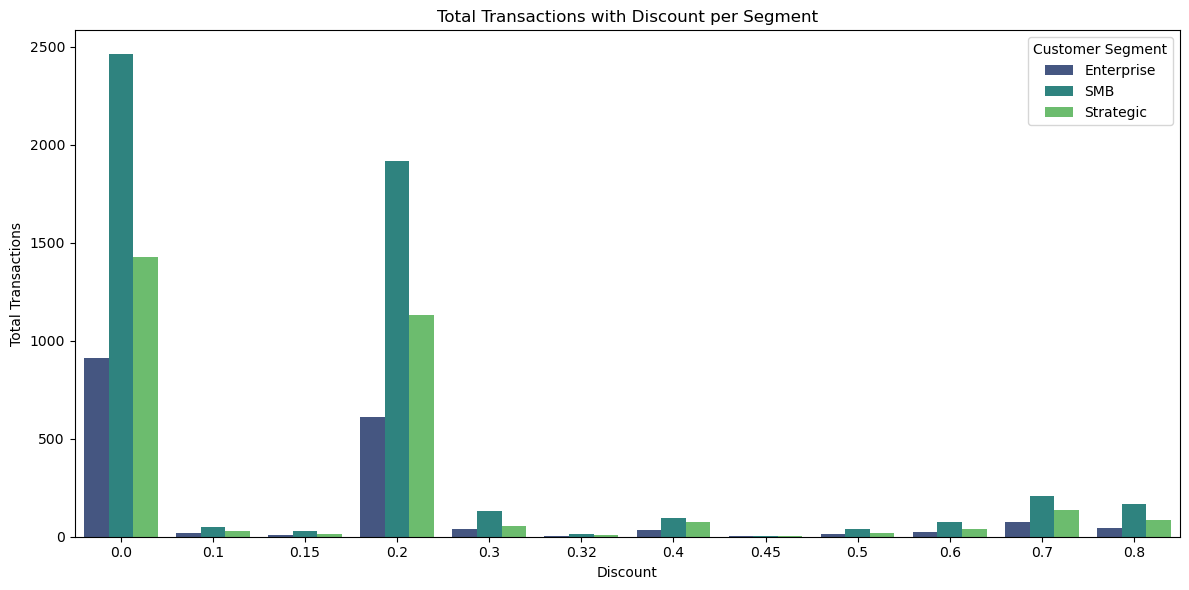

In [229]:
# Visualization of Total Transactions with Discount per Segment
df_plot = disc_segment.stack().reset_index()
df_plot.columns = ['Segment', 'Discount', 'Total Transaction']
df_plot = df_clean.groupby(['Segment', 'Discount']).size().reset_index(name='Total Transaction')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_plot,
    x='Discount',
    y='Total Transaction',
    hue='Segment',
    palette='viridis'  
)
plt.title('Total Transactions with Discount per Segment')
plt.ylabel('Total Transactions')
plt.xlabel('Discount')
plt.legend(title='Customer Segment')
plt.tight_layout()

**Insight**
1. SMB dominates in volume across all discount levels, including high discount brackets (≥50%), especially 70% and 80%.
2. Enterprise transactions are concentrated at 0% and 20% discounts.
3. Strategic customers also exhibit a notable presence in the high-discount brackets (70% and 80%), but not as much as SMB.

Discounting practices vary meaningfully by customer segment. While SMB customers frequently receive both no discounts and high discounts, Enterprise customers are more often subject to no or moderate discounts (20%).

#### **Goal 4**
Evaluate and optimize AWS’s discounting strategies across customer segments and product lines, with the aim of enhancing overall profitability beyond a volume-driven sales model.

#### **Answer**
The current discounting strategy at AWS, which heavily emphasizes sales volume, does not consistently translate into improved profitability. Instead, it introduces risks of financial loss, particularly when high discounts are applied across customer segments without accounting for segment-specific profitability patterns. Thus, there is a strong rationale to restructure the approach by optimizing discounts and pricing at the segment and product-line level.
1. High Sales isn't Equal to High Profit
   Analysis shows that higher sales volumes are not a guarantee of positive profit, especially when high discounts are involved. Transactions in the upper sales tier were often associated with negative profit margins.
2. Segment-Spesific Discounting Behavior
    A bivariate hypothesis test found a statistically significant association between customer segment and discount levels (p = 0.031). SMB and Strategic segments are more frequently targeted with mid-to-high discounts, yet this does not proportionally yield higher profitability.
3. Discount Depth and Frequency Are Not Profit-Aligned
   There's a substantial number of transactions in SMB and Strategic segments occur at discount rates ≥ 30%, many of which correspond to negative or low profit outcomes.

---

# **E. Conclusion and Recommendation** 

## **A. Conclusion**
The analysis of AWS SaaS transactions reveals several key findings regarding profitability inefficiencies:

**1. High Sales Do Not Guarantee Profitability**\
A substantial number of transactions with high sales volume result in negative profit. This indicates inefficiencies in discounting strategies, as well as possible misalignment in product and customer targeting. Also revenue volume alone is insufficient to determine product success and may mask underlying financial losses.

**2. Discounts Are the Most Influential Factor of Negative Profit**\
Results from the multivariate logistic regression analysis show that discount are significantly associated with negative profit outcomes. As discount values increase, so does the likelihood of a transaction yielding a negative profit.

**3. Sales-Profit Divergence Over Time Suggests Structural Issues**\
Time series analysis from 2020 to 2023 shows recurring surges in sales, particularly during peak seasons (September to December), without corresponding increases in profit. While sales have grown steadily, especially in late 2023, profits remain relatively flat. This suggests that short-term revenue gains (likely driven by seasonal promotions or discounts) are not translating into long-term financial sustainability.

**4. Uneven Discount Discipline from Segment-Level**\
The Enterprise segment demonstrates strong profitability, characterized by minimal discounting and relatively high median profits. This suggests that pricing strategies in this segment are better aligned with value delivery. The Strategic segment also remains profitable, although it experiences slightly greater exposure to high discount levels compared to Enterprise, indicating room for improvement in discount control. In contrast, the SMB segment is the most vulnerable, suffering from widespread discount overuse, particularly at extreme levels of 70–80%, and disproportionately contributes to negative profit outcome.

## **Recommendations**

**1. Aligning Sales Targets with Profitability Goals**
A significant proportion of transactions with high sales volume fail to yield positive profit margins, suggesting a misalignment between sales strategies and profitability objectives. Sales performance should be evaluated not solely on revenue generation but also on contribution to net profit.\
Strategic Action:
- Revise sales incentive structures to incorporate profit-based performance indicators.
- Conduct periodic margin reviews and adjust pricing structures accordingly.

**2. Reforming Discount Governance Policies**
Excessive discounting emerges as the most statistically significant factor associated with negative profit margins. Implementing stricter discount policies is imperative to protect margin integrity.\
Strategic Action:
- Set maximum discount thresholds tailored to each customer segment.
- Require managerial approval for discounts exceeding established limits.
- Monitor discounting behavior and introduce controls to prevent misuse.
  
**3. Optimizing Promotional Campaigns Based on Profitability Metrics**
Seasonal promotional efforts often prioritize sales volume at the expense of profitability. A shift towards value-based promotional strategies is required to ensure financial efficiency.\
Strategic Action:
- Conduct pre and post-campaign profitability analysis.
- Avoid deep discounts during peak seasons; focus instead on bundling or value-added promotions.

**4. Implementing Segment-Specific Pricing and Discount Strategies**
    The impact of discounting on profitability varies across customer segments. Therefore, a uniform approach to discounting is ineffective and potentially detrimental in certain segments.\
Strategic Action:
- Enterprise Segment: Maintain current pricing strategies and encourage premium product adoption.
- Strategic Segment: Introduce tighter discount controls and conduct targeted elasticity analyses.
- SMB Segment: Cap discounts at 30% and consider implementing non-price incentives such as loyalty programs.